# Pacotes

In [1]:
# Bibliotecas padrão e manipulação de dados
import os
import pickle
import re
import warnings
from datetime import datetime, date
import numpy as np
import pandas as pd
from pytz import timezone
from unidecode import unidecode

# Configurações e filtros
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

plt.style.use('ggplot')

# Machine Learning - Modelos e Pré-processamento
import shap
import sklearn
import xgboost as xgb
import lightgbm as lgb
import ppscore as pps
from catboost import Pool
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    train_test_split, cross_val_score, RepeatedStratifiedKFold, KFold, StratifiedKFold, GridSearchCV
)
from sklearn.metrics import (
    accuracy_score, average_precision_score, classification_report, confusion_matrix, f1_score,
    log_loss, precision_recall_curve, precision_score, recall_score, roc_auc_score, roc_curve, auc
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import (
    VarianceThreshold, RFE, SelectFromModel, SequentialFeatureSelector, mutual_info_classif, mutual_info_regression
)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.inspection import permutation_importance
from sklearn.neighbors import KDTree
from sklearn.tree import DecisionTreeClassifier
from boruta import BorutaPy

# Balanceamento de classes
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.pipeline import make_pipeline

# Estatística e testes de hipótese
from scipy.stats import (
    chi2_contingency, kruskal, ks_2samp, fisher_exact, mannwhitneyu, power_divergence
)
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Modelos avançados e otimização
from hyperopt import fmin, tpe, Trials, hp, STATUS_OK
from hyperopt.pyll import scope
from skopt import forest_minimize

# Avaliação de modelos e explanação
from shap import Explainer

# Salvamento e carregamento de modelos com MLflow
#import mlflow
#from mlflow.models import infer_signature
#import mlflow.lightgbm

import catboost as ctb

# Impressão de versões das bibliotecas utilizadas
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"XGBoost version: {xgb.__version__}")
print(f"LightGBM version: {lgb.__version__}")
print(f"CatBoost version: {ctb.__version__}")
print(f"SHAP version: {shap.__version__}")
print(f"PPScore version: {pps.__version__}")
print(f"missingno version: {msno.__version__}")
#print(f"MLflow version: {mlflow.__version__}")

Pandas version: 2.1.4
NumPy version: 1.26.2
Scikit-learn version: 1.4.2
XGBoost version: 2.0.2
LightGBM version: 4.4.0
CatBoost version: 1.2.2
SHAP version: 0.44.0
PPScore version: 0.0.2
missingno version: 0.5.2


# Carregando Dados

In [14]:
# Carregamento de dados históricos de voos a partir de um arquivo CSV.

# Definindo o caminho do arquivo CSV que contém os dados históricos de voos.
file_path = 'df_voos_completo_2024.csv'

# Lendo o arquivo CSV e carregando os dados em um DataFrame do pandas.
df = pd.read_csv(file_path)

In [60]:
# Carregamento de dados históricos de voos a partir de um arquivo CSV.

# Definindo o caminho do arquivo CSV que contém os dados históricos de voos.
file_path = 'df_voos_completo_2022_2023.csv'

# Lendo o arquivo CSV e carregando os dados em um DataFrame do pandas.
df = pd.read_csv(file_path)

In [22]:
df

,nome_empresas,numero_voo,codigo_di,codigo_tipo_linha,partida_prevista,partida_real,chegada_prevista,chegada_real,situacao_voo,descricao_origem,pais_origem,continente_origem,descricao_destino,pais_destino,continente_destino,status_do_voo,delta_tempo_partida_delta,delta_tempo_chegada_delta,delta_tempo_partida_int,delta_tempo_chegada_int,cidade_origem,uf_origem,cidade_destino,uf_destino,mes_partida,dia_semana_partida,dia_mes_partida,hora_partida,mes_chegada,dia_semana_chegada,dia_mes_chegada,hora_chegada,altitude_origem,latitude_aero_origem,longitude_aero_origem,altitude_destino,latitude_aero_destino,longitude_aero_destino,rota,data_partida,data_chegada,regiao_origem,precipitacao_total_horario_mm__origem,pressao_atmosferica_ao_nivel_da_estacao_horaria_mb__origem,pressao_atmosferica_max_na_hora_ant_aut_mb__origem,pressao_atmosferica_min_na_hora_ant_aut_mb__origem,temperatura_do_ar_bulbo_seco_horaria_degc__origem,temperatura_do_ponto_de_orvalho_degc__origem,temperatura_maxima_na_hora_ant_aut_degc__origem,temperatura_minima_na_hora_ant_aut_degc__origem,temperatura_orvalho_max_na_hora_ant_aut_degc__origem,temperatura_orvalho_min_na_hora_ant_aut_degc__origem,umidade_rel_max_na_hora_ant_aut_pcnt__origem,umidade_rel_min_na_hora_ant_aut_pcnt__origem,umidade_relativa_do_ar_horaria_pcnt__origem,vento_direcao_horaria_gr_deg_gr__origem,vento_rajada_maxima_ms__origem,vento_velocidade_horaria_ms__origem,regiao_destino,precipitacao_total_horario_mm__destino,pressao_atmosferica_ao_nivel_da_estacao_horaria_mb__destino,pressao_atmosferica_max_na_hora_ant_aut_mb__destino,pressao_atmosferica_min_na_hora_ant_aut_mb__destino,temperatura_do_ar_bulbo_seco_horaria_degc__destino,temperatura_do_ponto_de_orvalho_degc__destino,temperatura_maxima_na_hora_ant_aut_degc__destino,temperatura_minima_na_hora_ant_aut_degc__destino,temperatura_orvalho_max_na_hora_ant_aut_degc__destino,temperatura_orvalho_min_na_hora_ant_aut_degc__destino,umidade_rel_max_na_hora_ant_aut_pcnt__destino,umidade_rel_min_na_hora_ant_aut_pcnt__destino,umidade_relativa_do_ar_horaria_pcnt__destino,vento_direcao_horaria_gr_deg_gr__destino,vento_rajada_maxima_ms__destino,vento_velocidade_horaria_ms__destino
0,TAM,3194,0,N,2022-02-18 04:35:00,2022-02-18 04:31:00,2022-02-18 05:45:00,2022-02-18 05:31:00,NaN,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,BRASIL,AMERICA DO SUL,GUARULHOS - GOVERNADOR ANDRE FRANCO MONTORO,BRASIL,AMERICA DO SUL,Pontual,0 days 00:04:00,0 days 00:14:00,4,14,RIO DE JANEIRO,RJ,GUARULHOS,SP,Fevereiro,Sexta-feira,18.0,4,Fevereiro,Sexta-feira,18.0,5,"9,0",-22.810000,-43.250556,"750,0",-23.435556,-46.473056,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,2022-02-18,2022-02-18,SE,0.0,1007.575,1008.575,1007.575,22.70,21.700000,22.925,22.675,21.900000,21.625000,94.250000,93.500000,94.0,178.50,2.45,0.775,SE,0.0,923.7,924.3,923.6,18.1,17.3,18.2,18.1,17.5,17.2,95.0,94.0,95.0,97.0,2.4,1.1
1,TAM,3265,0,N,2022-07-06 04:20:00,2022-07-06 04:14:00,2022-07-06 06:05:00,2022-07-06 06:02:00,REALIZADO,PRESIDENTE JUSCELINO KUBITSCHEK,BRASIL,AMERICA DO SUL,GUARULHOS - GOVERNADOR ANDRE FRANCO MONTORO,BRASIL,AMERICA DO SUL,Pontual,0 days 00:06:00,0 days 00:03:00,6,3,BRASILIA,DF,GUARULHOS,SP,Julho,Quarta-feira,6.0,4,Julho,Quarta-feira,6.0,6,"1066,0",-15.871111,-47.918611,"750,0",-23.435556,-46.473056,PRESIDENTE JUSCELINO KUBITSCHEK -> GUARULHOS -...,2022-07-06,2022-07-06,CO,0.0,890.700,890.800,890.600,16.60,10.100000,16.900,16.400,10.200000,9.900000,66.000000,64.000000,65.0,116.00,3.40,1.600,SE,0.0,931.2,931.4,931.2,10.6,9.0,11.1,10.1,9.2,8.3,90.0,87.0,90.0,174.0,1.3,0.1
2,AZUL,4619,0,N,2022-07-01 08:40:00,2022-07-01 08:45:00,2022-07-01 12:00:00,2022-07-01 11:58:00,REALIZADO,GUARARAPES - GILBERTO FREYRE,BRASIL,AMERICA DO SUL,GUARULHOS - GOVERNADOR ANDRE FRANCO MONTORO,BRASIL,AMERICA DO SUL,Pontual,0 days 00:05:00,0 days 00:02:00,5,2,RECIFE,PE,GUARULHOS,SP,Julho,Sexta-feira,1.0,8,Julho,Sexta-feira,1.0,12,"10,0",-8.126389,-34.922778,"750,0",-23.435556,-46.473056,GUARARAPES - GILBERTO FREYRE -> 

In [26]:
df['dia_semana_partida'].unique()

array(['Sexta-feira', 'Quarta-feira', 'Domingo', 'Segunda-feira',
       'Terça-feira', 'Sábado', 'Quinta-feira'], dtype=object)

In [61]:
df = df[df['situacao_voo'] == 'REALIZADO']

In [62]:
df.nunique()

nome_empresas                                         3
numero_voo                                         4907
codigo_di                                             5
codigo_tipo_linha                                     2
partida_prevista                                 163974
                                                  ...  
umidade_rel_min_na_hora_ant_aut_pcnt__destino       446
umidade_relativa_do_ar_horaria_pcnt__destino        432
vento_direcao_horaria_gr_deg_gr__destino           1569
vento_rajada_maxima_ms__destino                    1003
vento_velocidade_horaria_ms__destino                566
Length: 75, dtype: int64

In [14]:
df = df[df['situacao_voo'] == 'REALIZADO']

# Converter 'chegada_real' para datetime
df['chegada_real'] = pd.to_datetime(df['chegada_real'], errors='coerce')

# Adicionar a coluna 'ano' extraindo o ano de 'chegada_real'
df['ano'] = df['chegada_real'].dt.year.astype(int)


# Mapeamento para dias da semana e meses
mapeamento_dias = {0: 'Segunda-feira', 1: 'Terça-feira', 2: 'Quarta-feira', 3: 'Quinta-feira', 4: 'Sexta-feira', 5: 'Sábado', 6: 'Domingo'}
mapeamento_meses = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho',
    7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}

# Aplicando os mapeamentos
df['dia_semana_partida'] = df['dia_semana_partida'].map(mapeamento_dias)
df['dia_semana_chegada'] = df['dia_semana_chegada'].map(mapeamento_dias)
df['mes_partida'] = df['mes_partida'].map(mapeamento_meses)
df['mes_chegada'] = df['mes_chegada'].map(mapeamento_meses)

# Supondo que seu DataFrame seja chamado df
df['altitude_origem'] = df['altitude_origem'].str.replace(',', '.').astype(float)
df['altitude_destino'] = df['altitude_destino'].str.replace(',', '.').astype(float)

In [63]:
df = df.drop(columns = ['mes_chegada','dia_semana_chegada','hora_chegada','delta_tempo_partida_int','delta_tempo_partida_delta', 
                        'delta_tempo_chegada_delta','dia_mes_chegada','altitude_origem','altitude_destino',
                        'continente_destino','pais_destino','delta_tempo_chegada_int','dia_semana_chegada',
                        'hora_chegada','data_chegada','data_partida','continente_origem','pais_origem',
                        'situacao_voo','chegada_prevista','chegada_real','partida_real',
                        'partida_prevista','chegada_prevista','chegada_real'])

In [64]:
# Supondo que o seu DataFrame seja df
df['numero_empresa_voo'] = df['nome_empresas'] + "_" + df['numero_voo'].astype(str)

# Dropar a coluna 'numero_voo'
df = df.drop(columns=['numero_voo'])

In [65]:
df = df.dropna()

In [66]:
df.dropna()

,nome_empresas,codigo_di,codigo_tipo_linha,descricao_origem,descricao_destino,status_do_voo,cidade_origem,uf_origem,cidade_destino,uf_destino,mes_partida,dia_semana_partida,dia_mes_partida,hora_partida,latitude_aero_origem,longitude_aero_origem,latitude_aero_destino,longitude_aero_destino,rota,regiao_origem,precipitacao_total_horario_mm__origem,pressao_atmosferica_ao_nivel_da_estacao_horaria_mb__origem,pressao_atmosferica_max_na_hora_ant_aut_mb__origem,pressao_atmosferica_min_na_hora_ant_aut_mb__origem,temperatura_do_ar_bulbo_seco_horaria_degc__origem,temperatura_do_ponto_de_orvalho_degc__origem,temperatura_maxima_na_hora_ant_aut_degc__origem,temperatura_minima_na_hora_ant_aut_degc__origem,temperatura_orvalho_max_na_hora_ant_aut_degc__origem,temperatura_orvalho_min_na_hora_ant_aut_degc__origem,umidade_rel_max_na_hora_ant_aut_pcnt__origem,umidade_rel_min_na_hora_ant_aut_pcnt__origem,umidade_relativa_do_ar_horaria_pcnt__origem,vento_direcao_horaria_gr_deg_gr__origem,vento_rajada_maxima_ms__origem,vento_velocidade_horaria_ms__origem,regiao_destino,precipitacao_total_horario_mm__destino,pressao_atmosferica_ao_nivel_da_estacao_horaria_mb__destino,pressao_atmosferica_max_na_hora_ant_aut_mb__destino,pressao_atmosferica_min_na_hora_ant_aut_mb__destino,temperatura_do_ar_bulbo_seco_horaria_degc__destino,temperatura_do_ponto_de_orvalho_degc__destino,temperatura_maxima_na_hora_ant_aut_degc__destino,temperatura_minima_na_hora_ant_aut_degc__destino,temperatura_orvalho_max_na_hora_ant_aut_degc__destino,temperatura_orvalho_min_na_hora_ant_aut_degc__destino,umidade_rel_max_na_hora_ant_aut_pcnt__destino,umidade_rel_min_na_hora_ant_aut_pcnt__destino,umidade_relativa_do_ar_horaria_pcnt__destino,vento_direcao_horaria_gr_deg_gr__destino,vento_rajada_maxima_ms__destino,vento_velocidade_horaria_ms__destino,numero_empresa_voo
1,TAM,0,N,PRESIDENTE JUSCELINO KUBITSCHEK,GUARULHOS - GOVERNADOR ANDRE FRANCO MONTORO,Pontual,BRASILIA,DF,GUARULHOS,SP,Julho,Quarta-feira,6.0,4,-15.871111,-47.918611,-23.435556,-46.473056,PRESIDENTE JUSCELINO KUBITSCHEK -> GUARULHOS -...,CO,0.0,890.700,890.800,890.600,16.600,10.100000,16.90,16.40,10.200000,9.900000,66.000000,64.000000,65.000000,116.00,3.400,1.60,SE,0.0,931.2,931.40,931.2,10.6,9.00,11.10,10.10,9.20,8.3,90.0,87.0,90.0,174.0,1.3,0.1,TAM_3265
4,TAM,0,N,VAL DE CANS,GUARULHOS - GOVERNADOR ANDRE FRANCO MONTORO,Atrasado,BELEM,PA,GUARULHOS,SP,Maio,Segunda-feira,16.0,2,-1.384722,-48.478889,-23.435556,-46.473056,VAL DE CANS -> GUARULHOS - GOVERNADOR ANDRE FR...,N,0.0,1009.400,1009.500,1009.400,24.600,24.000000,24.70,24.50,24.100000,23.900000,97.000000,96.000000,96.000000,44.00,1.300,0.00,SE,0.0,925.9,926.10,925.9,16.3,15.20,16.50,16.30,15.40,15.2,93.0,93.0,93.0,161.0,4.0,1.4,TAM_3247
10,TAM,0,N,HERCILIO LUZ,GUARULHOS - GOVERNADOR ANDRE FRANCO MONTORO,Pontual,FLORIANOPOLIS,SC,GUARULHOS,SP,Novembro,Domingo,27.0,5,-27.670278,-48.552500,-23.435556,-46.473056,HERCILIO LUZ -> GUARULHOS - GOVERNADOR ANDRE F...,S,1.6,1016.300,1016.900,1016.300,21.900,19.900000,22.10,21.20,20.200000,19.300000,89.000000,89.000000,89.000000,115.00,7.500,2.70,SE,0.0,925.1,925.30,925.1,14.9,14.30,15.30,14.90,14.60,14.1,96.0,94.0,96.0,83.0,2.5,0.7,TAM_3301
11,TAM,0,N,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,GUARULHOS - GOVERNADOR ANDRE FRANCO MONTORO,Pontual,RIO DE JANEIRO,RJ,GUARULHOS,SP,Agosto,Sexta-feira,5.0,16,-22.810000,-43.250556,-23.435556,-46.473056,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,SE,0.0,1006.900,1007.225,1006.875,34.725,11.100000,34.90,33.50,11.966667,10.066667,26.666667,22.333333,24.000000,303.75,8.075,2.55,SE,0.0,927.3,927.30,926.0,18.4,13.60,21.90,18.40,14.70,13.3,74.0,64.0,74.0,83.0,8.2,3.6,TAM_3533
12,GOL,0,N,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,GUARULHOS - GOVERNADOR ANDRE FRANCO MONTORO,Pontual,RIO DE JANEIRO,RJ,GUARULHOS,SP,Dezembro,Segunda-feira,5.0,13,-22.810000,-43.250556,-23.435556,-46.473056,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,SE,0.0,1009.975,1010.000,1009.775,29.725,18.733333,30

In [35]:
# Salvar em CSV
df.to_csv("mlflow/df_feature_selection_mlflow.csv", index=False)

In [35]:
df

,nome_empresas,codigo_di,codigo_tipo_linha,descricao_origem,descricao_destino,status_do_voo,cidade_origem,uf_origem,cidade_destino,uf_destino,mes_partida,dia_semana_partida,dia_mes_partida,hora_partida,latitude_aero_origem,longitude_aero_origem,latitude_aero_destino,longitude_aero_destino,rota,regiao_origem,precipitacao_total_horario_mm__origem,pressao_atmosferica_ao_nivel_da_estacao_horaria_mb__origem,pressao_atmosferica_max_na_hora_ant_aut_mb__origem,pressao_atmosferica_min_na_hora_ant_aut_mb__origem,temperatura_do_ar_bulbo_seco_horaria_degc__origem,temperatura_do_ponto_de_orvalho_degc__origem,temperatura_maxima_na_hora_ant_aut_degc__origem,temperatura_minima_na_hora_ant_aut_degc__origem,temperatura_orvalho_max_na_hora_ant_aut_degc__origem,temperatura_orvalho_min_na_hora_ant_aut_degc__origem,umidade_rel_max_na_hora_ant_aut_pcnt__origem,umidade_rel_min_na_hora_ant_aut_pcnt__origem,umidade_relativa_do_ar_horaria_pcnt__origem,vento_direcao_horaria_gr_deg_gr__origem,vento_rajada_maxima_ms__origem,vento_velocidade_horaria_ms__origem,regiao_destino,precipitacao_total_horario_mm__destino,pressao_atmosferica_ao_nivel_da_estacao_horaria_mb__destino,pressao_atmosferica_max_na_hora_ant_aut_mb__destino,pressao_atmosferica_min_na_hora_ant_aut_mb__destino,temperatura_do_ar_bulbo_seco_horaria_degc__destino,temperatura_do_ponto_de_orvalho_degc__destino,temperatura_maxima_na_hora_ant_aut_degc__destino,temperatura_minima_na_hora_ant_aut_degc__destino,temperatura_orvalho_max_na_hora_ant_aut_degc__destino,temperatura_orvalho_min_na_hora_ant_aut_degc__destino,umidade_rel_max_na_hora_ant_aut_pcnt__destino,umidade_rel_min_na_hora_ant_aut_pcnt__destino,umidade_relativa_do_ar_horaria_pcnt__destino,vento_direcao_horaria_gr_deg_gr__destino,vento_rajada_maxima_ms__destino,vento_velocidade_horaria_ms__destino,numero_empresa_voo
1,TAM,0,N,PRESIDENTE JUSCELINO KUBITSCHEK,GUARULHOS - GOVERNADOR ANDRE FRANCO MONTORO,Pontual,BRASILIA,DF,GUARULHOS,SP,Julho,Quarta-feira,6.0,4,-15.871111,-47.918611,-23.435556,-46.473056,PRESIDENTE JUSCELINO KUBITSCHEK -> GUARULHOS -...,CO,0.0,890.700,890.800,890.600,16.600,10.100000,16.90,16.40,10.200000,9.900000,66.000000,64.000000,65.000000,116.00,3.400,1.60,SE,0.0,931.2,931.40,931.2,10.6,9.00,11.10,10.10,9.20,8.3,90.0,87.0,90.0,174.0,1.3,0.1,TAM_3265
4,TAM,0,N,VAL DE CANS,GUARULHOS - GOVERNADOR ANDRE FRANCO MONTORO,Atrasado,BELEM,PA,GUARULHOS,SP,Maio,Segunda-feira,16.0,2,-1.384722,-48.478889,-23.435556,-46.473056,VAL DE CANS -> GUARULHOS - GOVERNADOR ANDRE FR...,N,0.0,1009.400,1009.500,1009.400,24.600,24.000000,24.70,24.50,24.100000,23.900000,97.000000,96.000000,96.000000,44.00,1.300,0.00,SE,0.0,925.9,926.10,925.9,16.3,15.20,16.50,16.30,15.40,15.2,93.0,93.0,93.0,161.0,4.0,1.4,TAM_3247
10,TAM,0,N,HERCILIO LUZ,GUARULHOS - GOVERNADOR ANDRE FRANCO MONTORO,Pontual,FLORIANOPOLIS,SC,GUARULHOS,SP,Novembro,Domingo,27.0,5,-27.670278,-48.552500,-23.435556,-46.473056,HERCILIO LUZ -> GUARULHOS - GOVERNADOR ANDRE F...,S,1.6,1016.300,1016.900,1016.300,21.900,19.900000,22.10,21.20,20.200000,19.300000,89.000000,89.000000,89.000000,115.00,7.500,2.70,SE,0.0,925.1,925.30,925.1,14.9,14.30,15.30,14.90,14.60,14.1,96.0,94.0,96.0,83.0,2.5,0.7,TAM_3301
11,TAM,0,N,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,GUARULHOS - GOVERNADOR ANDRE FRANCO MONTORO,Pontual,RIO DE JANEIRO,RJ,GUARULHOS,SP,Agosto,Sexta-feira,5.0,16,-22.810000,-43.250556,-23.435556,-46.473056,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,SE,0.0,1006.900,1007.225,1006.875,34.725,11.100000,34.90,33.50,11.966667,10.066667,26.666667,22.333333,24.000000,303.75,8.075,2.55,SE,0.0,927.3,927.30,926.0,18.4,13.60,21.90,18.40,14.70,13.3,74.0,64.0,74.0,83.0,8.2,3.6,TAM_3533
12,GOL,0,N,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,GUARULHOS - GOVERNADOR ANDRE FRANCO MONTORO,Pontual,RIO DE JANEIRO,RJ,GUARULHOS,SP,Dezembro,Segunda-feira,5.0,13,-22.810000,-43.250556,-23.435556,-46.473056,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,SE,0.0,1009.975,1010.000,1009.775,29.725,18.733333,30

### VIF

In [36]:
def calculate_vif(X):
    # Verifica se há valores NaN e os remove ou imputa
    if X.isnull().values.any():
        X = X.fillna(0)  # ou use uma outra estratégia de imputação

    # Converte todas as colunas para numéricas, se possível
    X = X.apply(pd.to_numeric, errors='coerce')
    
    # Remove qualquer coluna que ainda contenha NaN após a conversão
    X = X.dropna(axis=1)
    
    # Escalar as variáveis pode ajudar na estabilidade do cálculo do VIF
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    vif_data = pd.DataFrame()
    vif_data['feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
    
    # Ordena os valores do VIF em ordem decrescente
    vif_data = vif_data.sort_values(by='VIF', ascending=False)
    
    # Plotando o gráfico
    plt.figure(figsize=(10, 6))
    sns.barplot(x='VIF', y='feature', data=vif_data, palette='viridis')
    plt.axvline(x=5, color='red', linestyle='dashed', linewidth=1)
    plt.xlabel('VIF')
    plt.ylabel('Variáveis')
    plt.title('Variance Inflation Factor (VIF) das Variáveis')
    plt.show()
    
    return vif_data


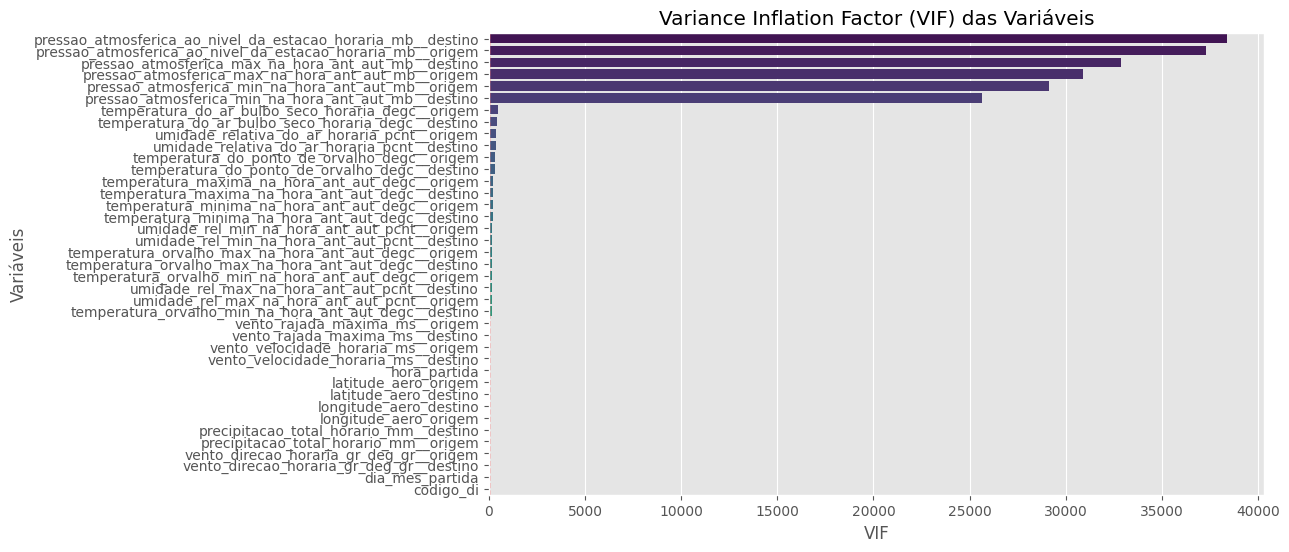

,feature,VIF
24,pressao_atmosferica_ao_nivel_da_estacao_horari...,38387.630266
8,pressao_atmosferica_ao_nivel_da_estacao_horari...,37318.828765
25,pressao_atmosferica_max_na_hora_ant_aut_mb__de...,32874.108862
9,pressao_atmosferica_max_na_hora_ant_aut_mb__or...,30916.590510
10,pressao_atmosferica_min_na_hora_ant_aut_mb__or...,29133.605115
26,pressao_atmosferica_min_na_hora_ant_aut_mb__de...,25644.729195
11,temperatura_do_ar_bulbo_seco_horaria_degc__origem,470.388734
27,temperatura_do_ar_bulbo_seco_horaria_degc__des...,435.801963
19,umidade_relativa_do_ar_horaria_pcnt__origem,363.074546
35,umidade_relativa_do_ar_horaria_pcnt__destino,352.424318


In [37]:
calculate_vif(df)

# Correlação de Spearman

In [67]:
def heatmap_correlacao_spearman(df: pd.DataFrame, annot: bool = True, figsize: tuple = (10, 10)):
    """
    Calcula a matriz de correlação de Spearman entre as variáveis numéricas de um DataFrame e
    gera um heatmap para visualização.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    annot : bool, opcional
        Se True, exibe os valores das correlações no heatmap. O padrão é True.
    figsize : tuple, opcional
        Tamanho da figura do heatmap. O padrão é (10, 8).

    Retorna:
    --------
    None
        Exibe o heatmap da correlação de Spearman.
    """
    
    # Selecionar apenas colunas numéricas
    df_numerico = df.select_dtypes(include=['float64', 'int64', 'int64'])
    
    if df_numerico.empty:
        raise ValueError("Não há colunas numéricas no DataFrame para calcular a correlação.")
    
    # Calcular a matriz de correlação de Spearman
    matriz_correlacao = df_numerico.corr(method='spearman')
    
    # Gerar o heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(matriz_correlacao, annot=annot, cmap='coolwarm', fmt='.1f', vmin=-1, vmax=1, linewidths=0.3)
    plt.title('Heatmap de Correlação de Spearman')
    plt.show()

In [68]:
df_pressao_origem = [
    'pressao_atmosferica_ao_nivel_da_estacao_horaria_mb__origem', 
    'pressao_atmosferica_max_na_hora_ant_aut_mb__origem', 
    'pressao_atmosferica_min_na_hora_ant_aut_mb__origem'
]

df_umidade_origem = [
    'umidade_rel_max_na_hora_ant_aut_pcnt__origem', 
    'umidade_rel_min_na_hora_ant_aut_pcnt__origem', 
    'umidade_relativa_do_ar_horaria_pcnt__origem'
]

df_pressao_destino = [
    'pressao_atmosferica_ao_nivel_da_estacao_horaria_mb__destino', 
    'pressao_atmosferica_max_na_hora_ant_aut_mb__destino', 
    'pressao_atmosferica_min_na_hora_ant_aut_mb__destino'
]

df_umidade_destino =  [
    'umidade_rel_max_na_hora_ant_aut_pcnt__destino', 
    'umidade_rel_min_na_hora_ant_aut_pcnt__destino', 
    'umidade_relativa_do_ar_horaria_pcnt__destino'
]

df_temp_origem = [
    'temperatura_do_ar_bulbo_seco_horaria_degc__origem', 
    'temperatura_do_ponto_de_orvalho_degc__origem', 
    'temperatura_maxima_na_hora_ant_aut_degc__origem', 
    'temperatura_minima_na_hora_ant_aut_degc__origem', 
    'temperatura_orvalho_max_na_hora_ant_aut_degc__origem', 
    'temperatura_orvalho_min_na_hora_ant_aut_degc__origem'
]

df_temp_destino = [
    'temperatura_do_ar_bulbo_seco_horaria_degc__destino', 
    'temperatura_do_ponto_de_orvalho_degc__destino', 
    'temperatura_maxima_na_hora_ant_aut_degc__destino', 
    'temperatura_minima_na_hora_ant_aut_degc__destino',  
    'temperatura_orvalho_max_na_hora_ant_aut_degc__destino', 
    'temperatura_orvalho_min_na_hora_ant_aut_degc__destino'
]

df_vento_origem = [
    'vento_direcao_horaria_gr_deg_gr__origem',
    'vento_rajada_maxima_ms__origem',
    'vento_velocidade_horaria_ms__origem',
]

df_vento_destino = [
 'vento_direcao_horaria_gr_deg_gr__destino',
 'vento_rajada_maxima_ms__destino',
 'vento_velocidade_horaria_ms__destino',
]

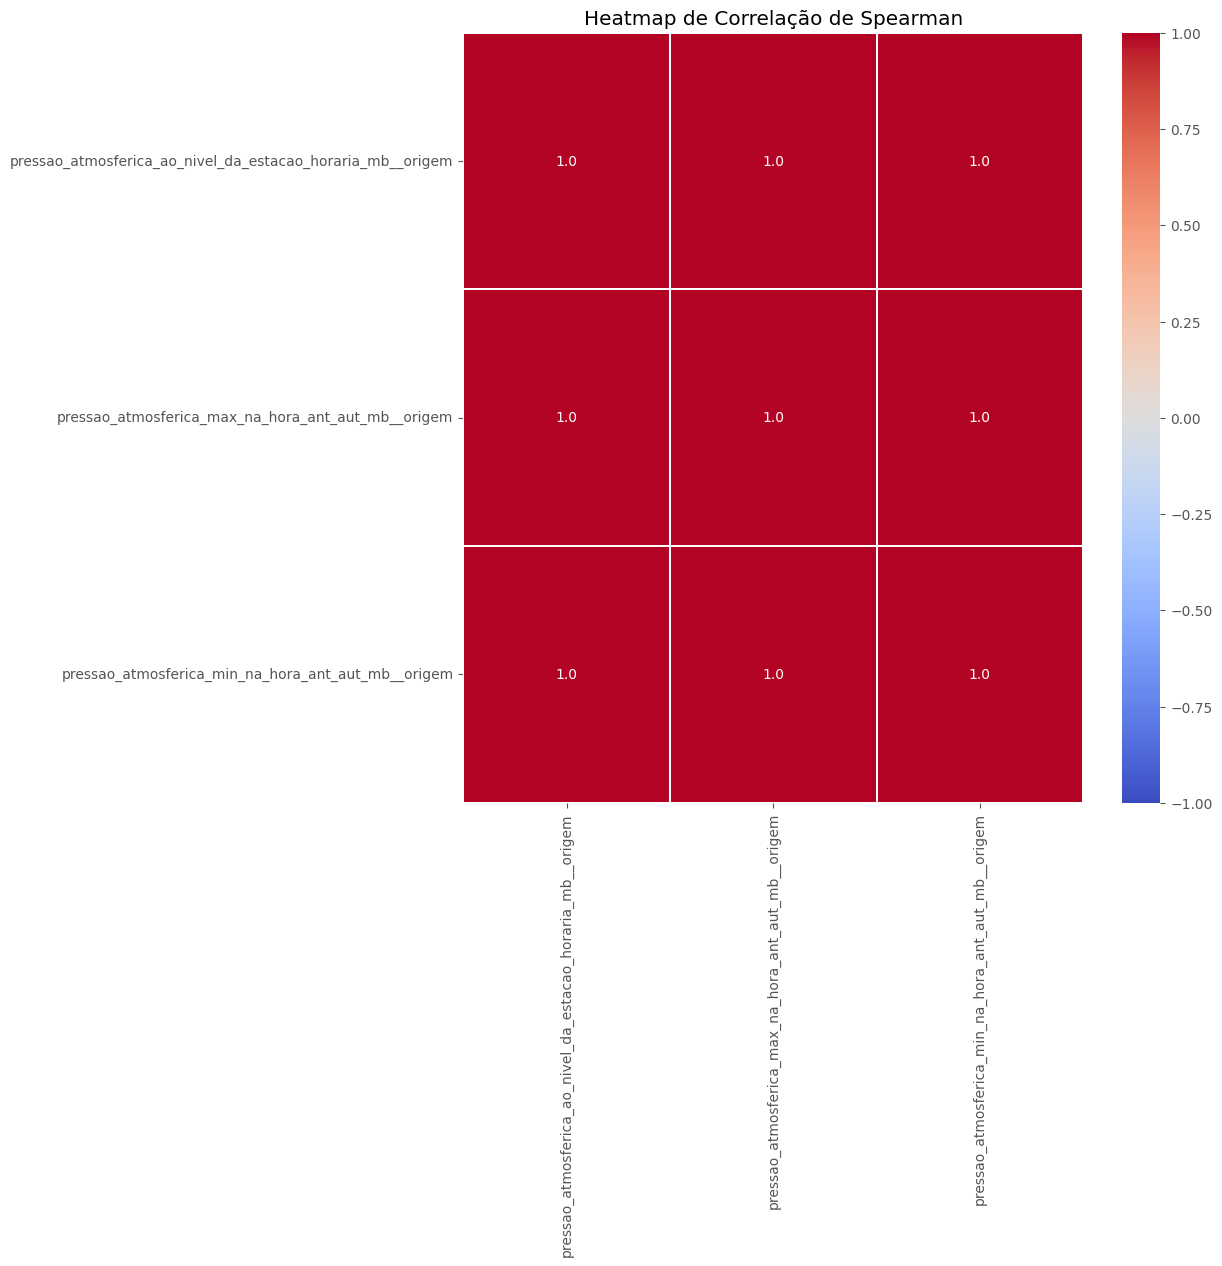

In [71]:
heatmap_correlacao_spearman(df[df_pressao_origem])

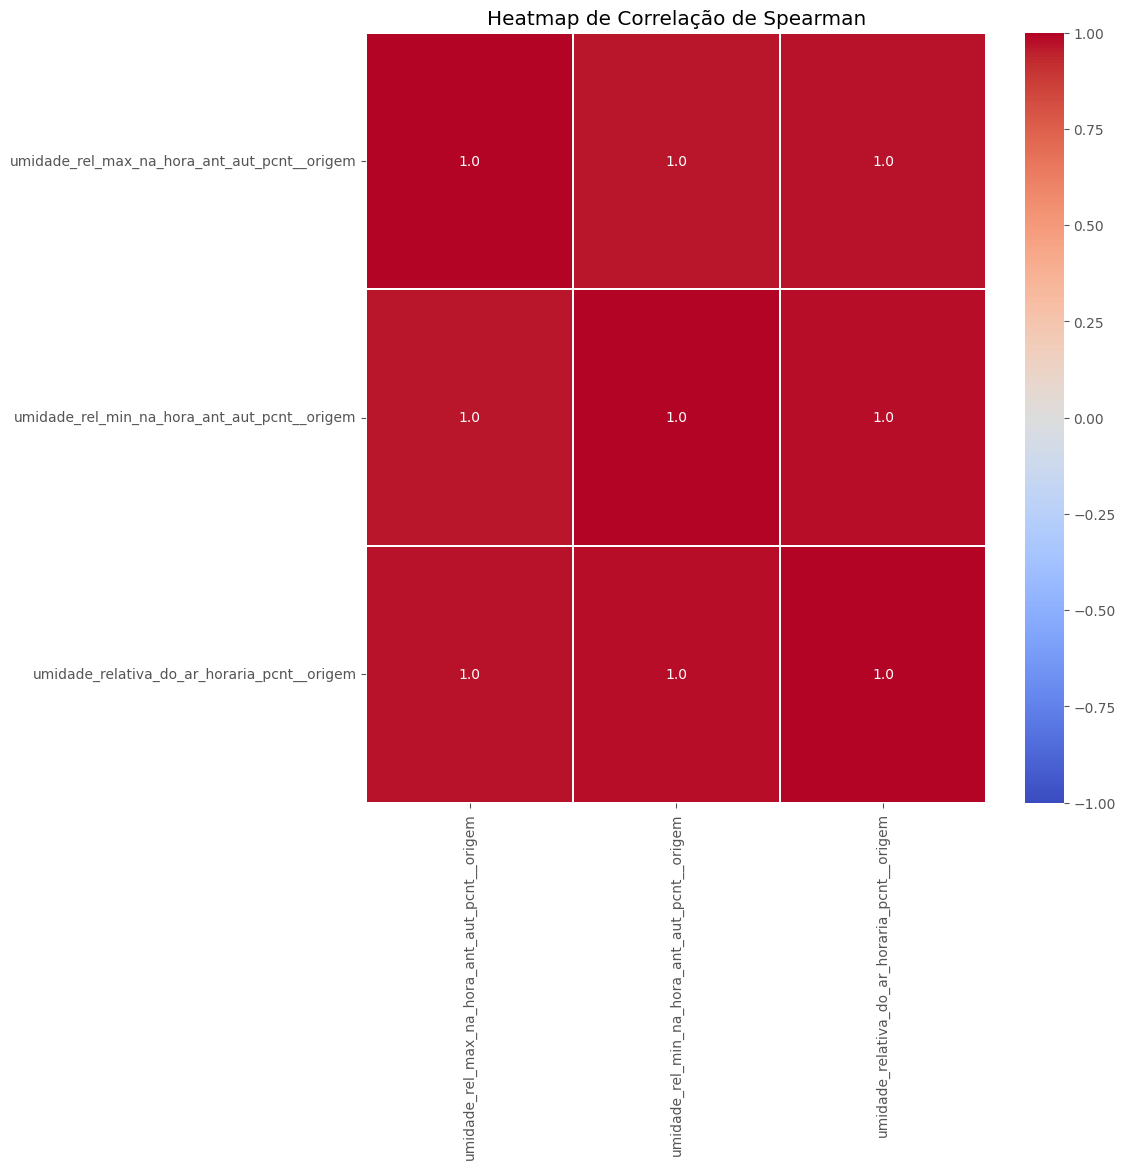

In [72]:
heatmap_correlacao_spearman(df[df_umidade_origem])

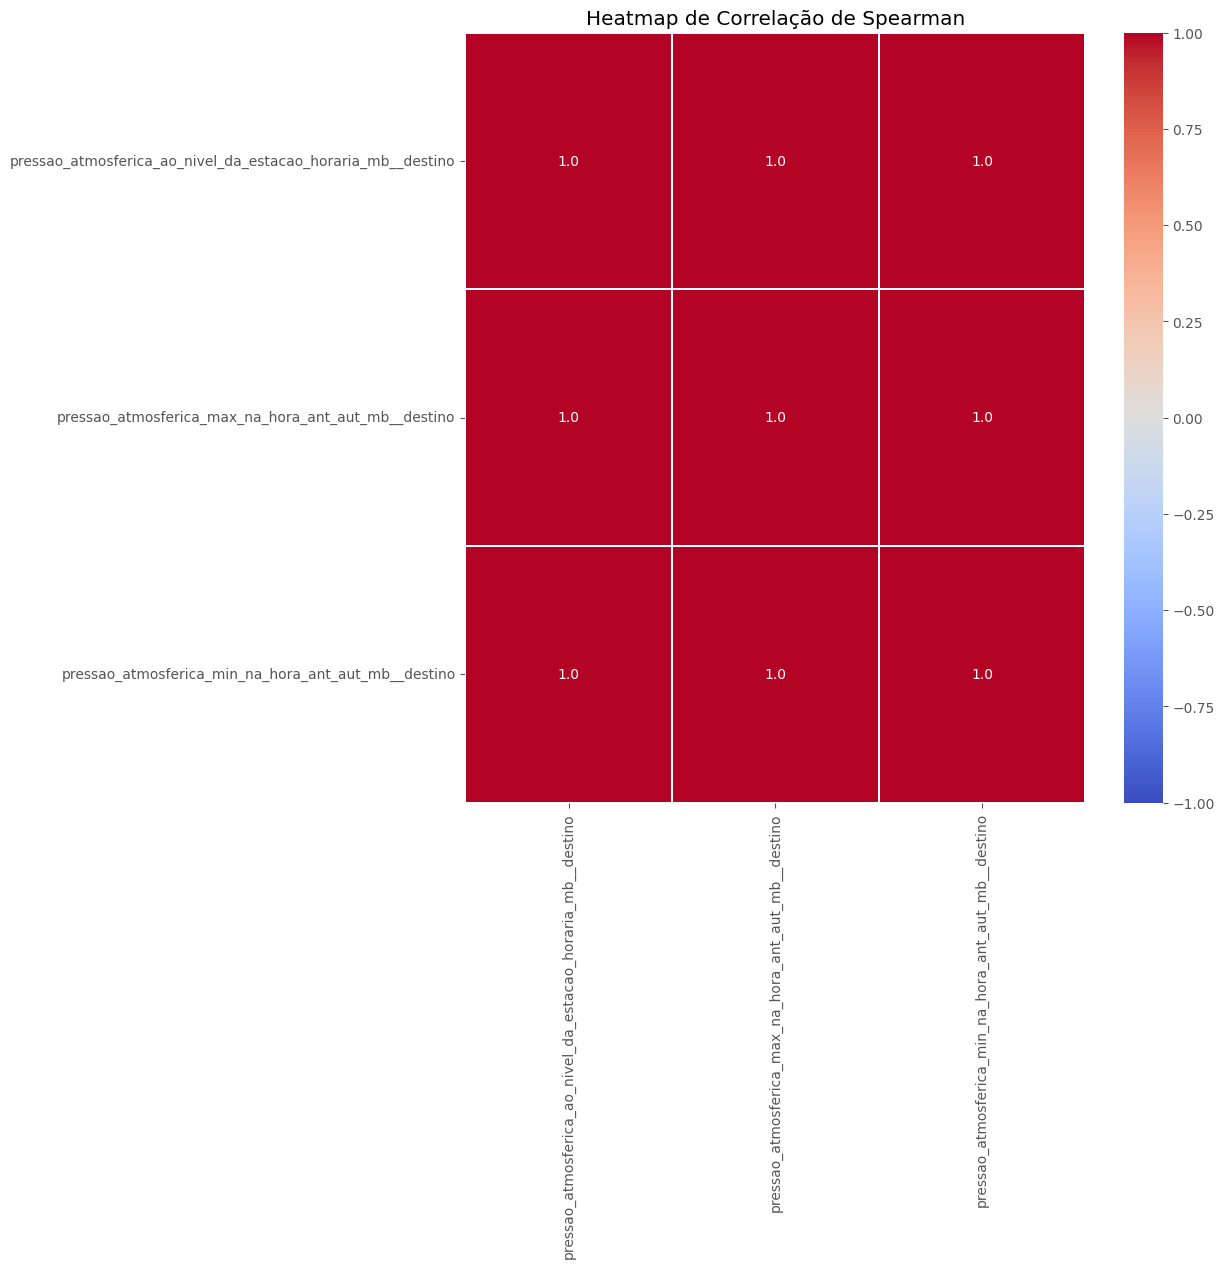

In [73]:
heatmap_correlacao_spearman(df[df_pressao_destino])

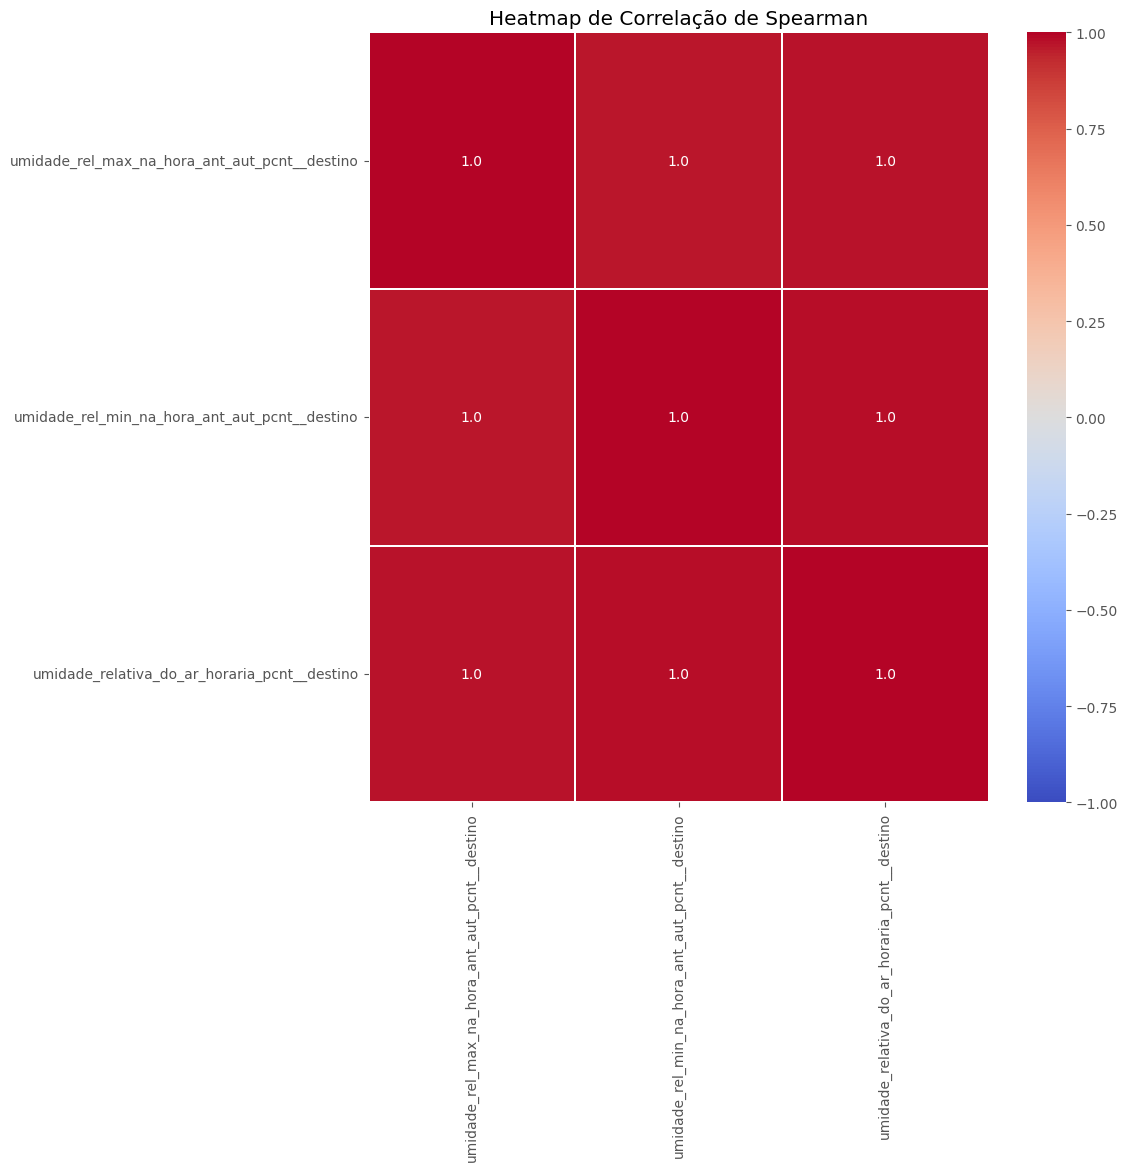

In [74]:
heatmap_correlacao_spearman(df[df_umidade_destino])

In [ ]:
heatmap_correlacao_spearman(df[df_temp_origem])

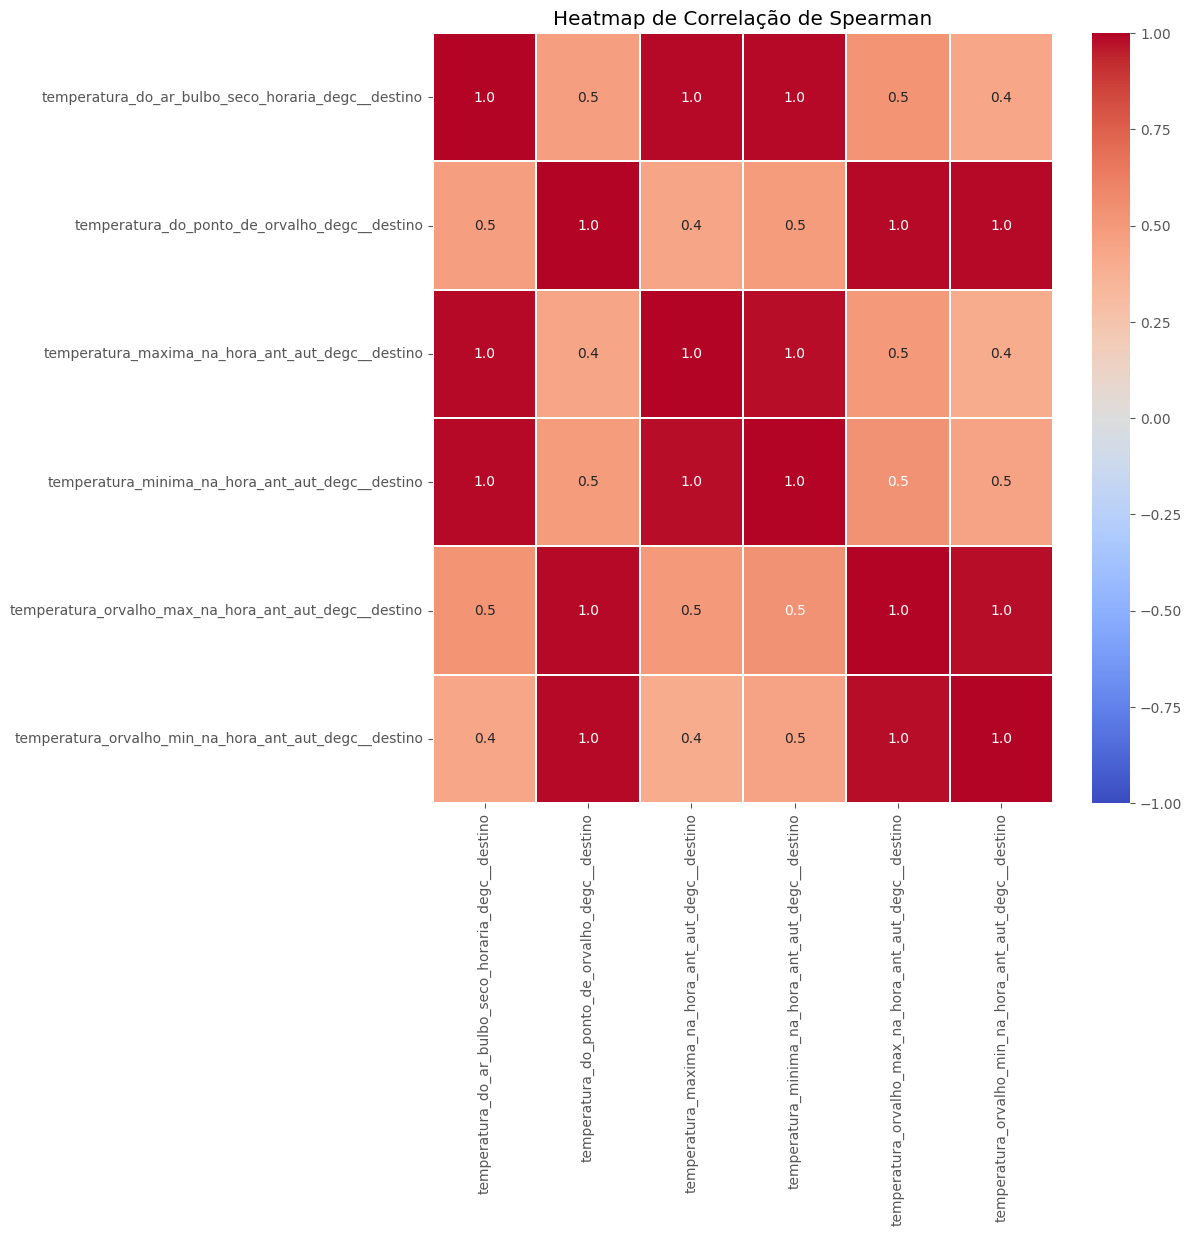

In [76]:
heatmap_correlacao_spearman(df[df_temp_destino])

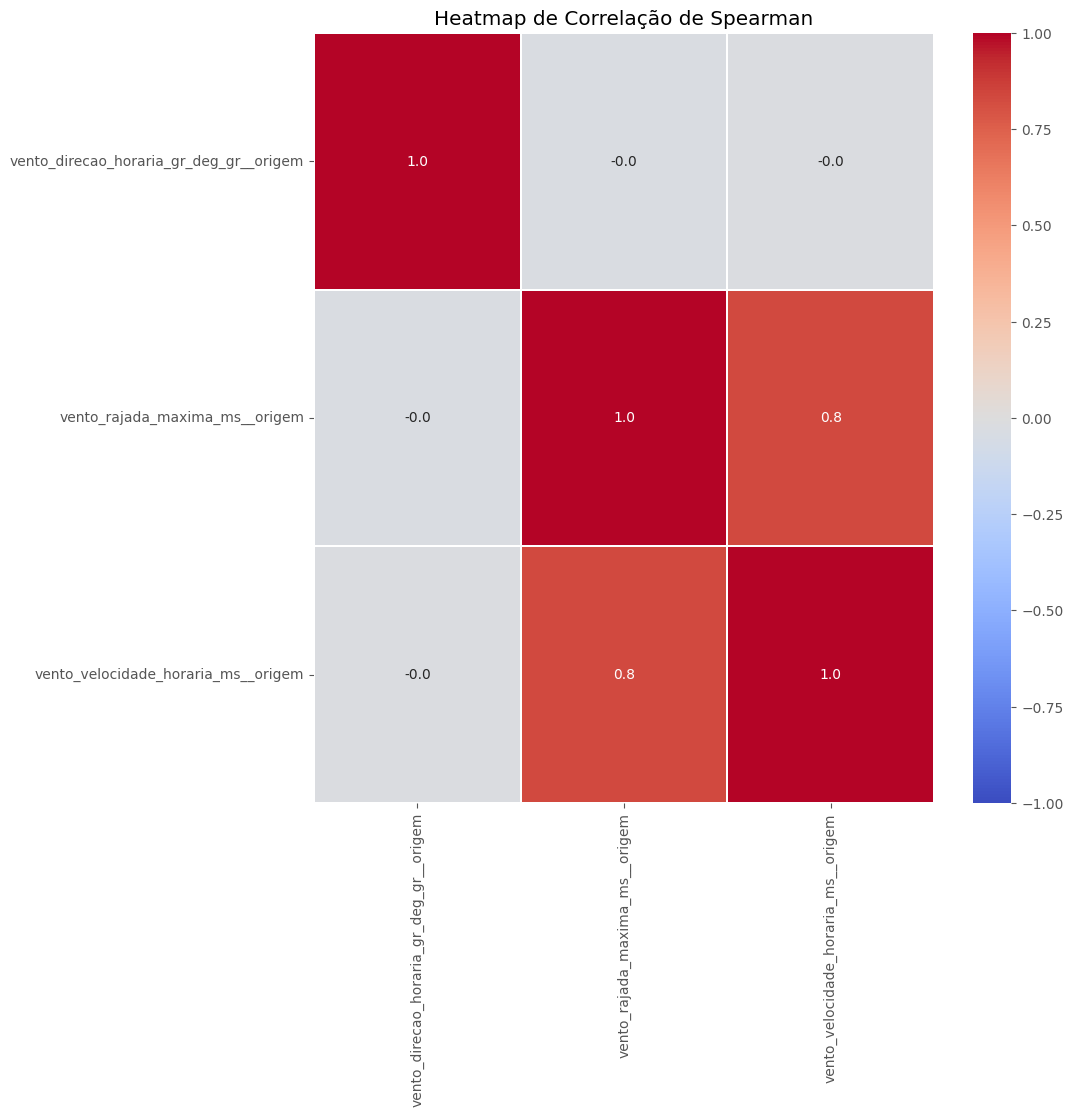

In [77]:
heatmap_correlacao_spearman(df[df_vento_origem])

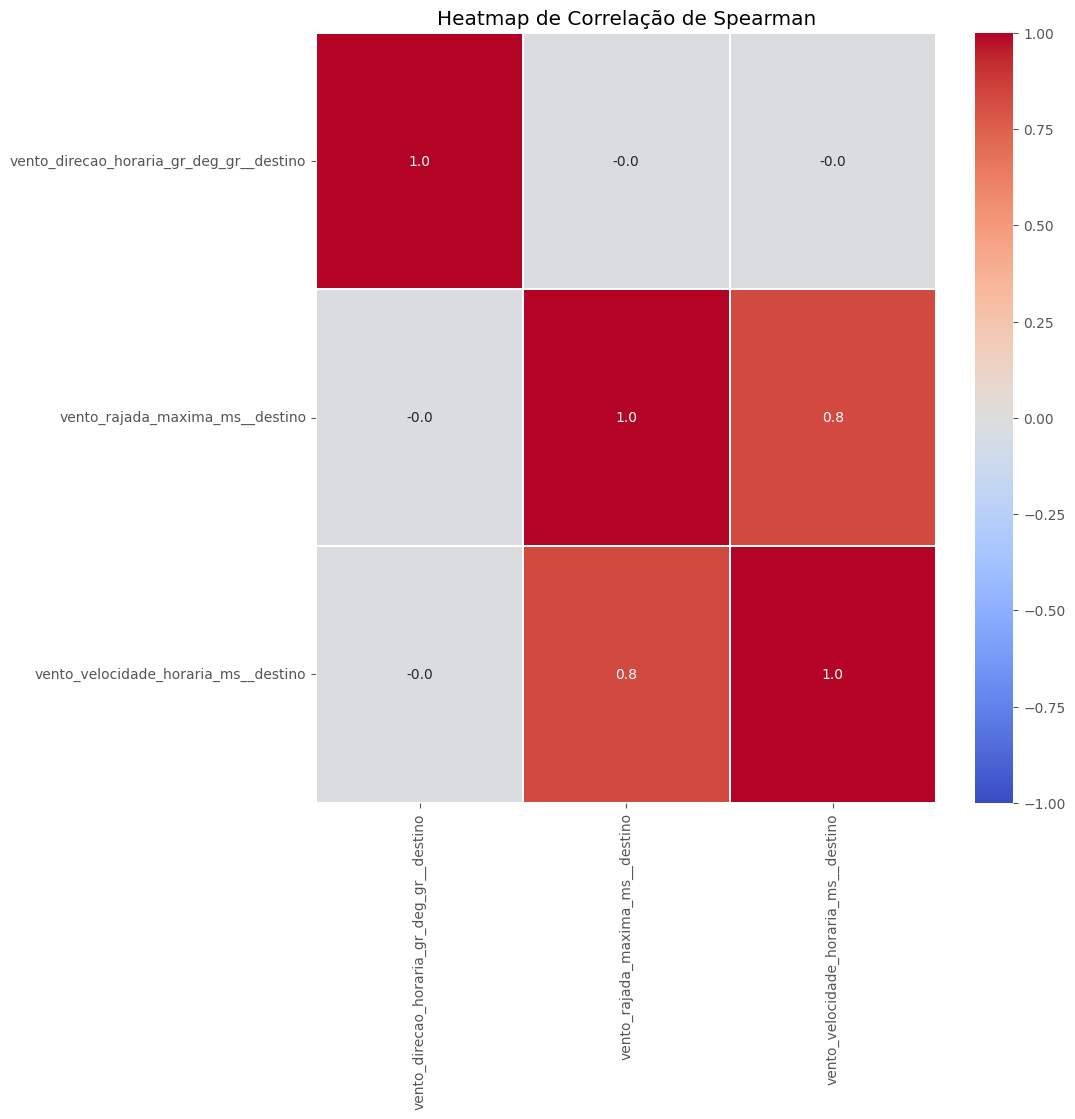

In [78]:
heatmap_correlacao_spearman(df[df_vento_destino])

# PCA redução de dimensionalidade

In [79]:
def aplicar_pca(df, colunas, n_componentes, nome_grupo):
    """
    Aplica PCA em um conjunto de colunas de um DataFrame, adiciona as componentes principais 
    ao DataFrame original e remove as colunas originais.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame contendo os dados.
    colunas : list
        Lista de colunas para aplicar o PCA.
    n_componentes : int
        Número de componentes principais a serem mantidos.
    nome_grupo : str
        Nome do grupo para identificação das novas colunas de componentes principais.

    Retorna:
    --------
    pd.DataFrame
        O DataFrame original com as componentes principais adicionadas e colunas originais removidas.
    """
    # Escalar os dados antes de aplicar o PCA
    scaler = StandardScaler()
    dados_escalados = scaler.fit_transform(df[colunas])
    
    # Aplicar o PCA
    pca = PCA(n_components=n_componentes)
    componentes_principais = pca.fit_transform(dados_escalados)
    
    # Adicionar componentes principais ao DataFrame original
    for i in range(n_componentes):
        df[f'{nome_grupo}_pca{i+1}'] = componentes_principais[:, i]
    
    # Remover as colunas originais
    df = df.drop(columns=colunas)
    
    return df

In [80]:
# Aplicação do PCA em cada grupo de colunas
df = aplicar_pca(df, [
    'pressao_atmosferica_ao_nivel_da_estacao_horaria_mb__origem', 
    'pressao_atmosferica_max_na_hora_ant_aut_mb__origem', 
    'pressao_atmosferica_min_na_hora_ant_aut_mb__origem'
], n_componentes=1, nome_grupo='pca_pressao_origem')

df = aplicar_pca(df, [
    'umidade_rel_max_na_hora_ant_aut_pcnt__origem', 
    'umidade_rel_min_na_hora_ant_aut_pcnt__origem', 
    'umidade_relativa_do_ar_horaria_pcnt__origem'
], n_componentes=1, nome_grupo='pca_umidade_origem')

df = aplicar_pca(df, [
    'pressao_atmosferica_ao_nivel_da_estacao_horaria_mb__destino', 
    'pressao_atmosferica_max_na_hora_ant_aut_mb__destino', 
    'pressao_atmosferica_min_na_hora_ant_aut_mb__destino'
], n_componentes=1, nome_grupo='pca_pressao_destino')

df = aplicar_pca(df, [
    'umidade_rel_max_na_hora_ant_aut_pcnt__destino', 
    'umidade_rel_min_na_hora_ant_aut_pcnt__destino', 
    'umidade_relativa_do_ar_horaria_pcnt__destino'
], n_componentes=1, nome_grupo='pca_umidade_destino')

df = aplicar_pca(df, [
    'temperatura_do_ar_bulbo_seco_horaria_degc__origem', 
    'temperatura_do_ponto_de_orvalho_degc__origem', 
    'temperatura_maxima_na_hora_ant_aut_degc__origem', 
    'temperatura_minima_na_hora_ant_aut_degc__origem', 
    'temperatura_orvalho_max_na_hora_ant_aut_degc__origem', 
    'temperatura_orvalho_min_na_hora_ant_aut_degc__origem'
], n_componentes=1, nome_grupo='pca_temperatura_origem')

df = aplicar_pca(df, [
    'temperatura_do_ar_bulbo_seco_horaria_degc__destino', 
    'temperatura_do_ponto_de_orvalho_degc__destino', 
    'temperatura_maxima_na_hora_ant_aut_degc__destino', 
    'temperatura_minima_na_hora_ant_aut_degc__destino',  
    'temperatura_orvalho_max_na_hora_ant_aut_degc__destino', 
    'temperatura_orvalho_min_na_hora_ant_aut_degc__destino'
], n_componentes=1, nome_grupo='pca_temperatura_destino')

df = aplicar_pca(df, [
    'vento_direcao_horaria_gr_deg_gr__origem',
    'vento_rajada_maxima_ms__origem',
    'vento_velocidade_horaria_ms__origem',
], n_componentes=1, nome_grupo='pca_vento_origem')

df = aplicar_pca(df, [
 'vento_direcao_horaria_gr_deg_gr__destino',
 'vento_rajada_maxima_ms__destino',
 'vento_velocidade_horaria_ms__destino',
], n_componentes=1, nome_grupo='pca_vento_destino')

In [40]:
list(df)

['nome_empresas',
 'codigo_di',
 'codigo_tipo_linha',
 'descricao_origem',
 'descricao_destino',
 'status_do_voo',
 'cidade_origem',
 'uf_origem',
 'cidade_destino',
 'uf_destino',
 'mes_partida',
 'dia_semana_partida',
 'dia_mes_partida',
 'hora_partida',
 'latitude_aero_origem',
 'longitude_aero_origem',
 'latitude_aero_destino',
 'longitude_aero_destino',
 'rota',
 'regiao_origem',
 'precipitacao_total_horario_mm__origem',
 'regiao_destino',
 'precipitacao_total_horario_mm__destino',
 'numero_empresa_voo',
 'pca_pressao_origem_pca1',
 'pca_umidade_origem_pca1',
 'pca_pressao_destino_pca1',
 'pca_umidade_destino_pca1',
 'pca_temperatura_origem_pca1',
 'pca_temperatura_destino_pca1',
 'pca_vento_origem_pca1',
 'pca_vento_destino_pca1']

In [24]:
# Salvar em CSV
df.to_csv("df_predicao_ootv_2024.csv", index=False)

In [41]:
df

,nome_empresas,codigo_di,codigo_tipo_linha,descricao_origem,descricao_destino,status_do_voo,cidade_origem,uf_origem,cidade_destino,uf_destino,mes_partida,dia_semana_partida,dia_mes_partida,hora_partida,latitude_aero_origem,longitude_aero_origem,latitude_aero_destino,longitude_aero_destino,rota,regiao_origem,precipitacao_total_horario_mm__origem,regiao_destino,precipitacao_total_horario_mm__destino,numero_empresa_voo,pca_pressao_origem_pca1,pca_umidade_origem_pca1,pca_pressao_destino_pca1,pca_umidade_destino_pca1,pca_temperatura_origem_pca1,pca_temperatura_destino_pca1,pca_vento_origem_pca1,pca_vento_destino_pca1
1,TAM,0,N,PRESIDENTE JUSCELINO KUBITSCHEK,GUARULHOS - GOVERNADOR ANDRE FRANCO MONTORO,Pontual,BRASILIA,DF,GUARULHOS,SP,Julho,Quarta-feira,6.0,4,-15.871111,-47.918611,-23.435556,-46.473056,PRESIDENTE JUSCELINO KUBITSCHEK -> GUARULHOS -...,CO,0.0,SE,0.0,TAM_3265,2.734330,0.627437,1.166231,-1.650976,3.030065,4.828122,-0.486250,-1.983914
4,TAM,0,N,VAL DE CANS,GUARULHOS - GOVERNADOR ANDRE FRANCO MONTORO,Atrasado,BELEM,PA,GUARULHOS,SP,Maio,Segunda-feira,16.0,2,-1.384722,-48.478889,-23.435556,-46.473056,VAL DE CANS -> GUARULHOS - GOVERNADOR ANDRE FR...,N,0.0,SE,0.0,TAM_3247,-1.830499,-2.249217,1.369452,-2.011858,-2.435116,1.808458,-1.947687,-0.499324
10,TAM,0,N,HERCILIO LUZ,GUARULHOS - GOVERNADOR ANDRE FRANCO MONTORO,Pontual,FLORIANOPOLIS,SC,GUARULHOS,SP,Novembro,Domingo,27.0,5,-27.670278,-48.552500,-23.435556,-46.473056,HERCILIO LUZ -> GUARULHOS - GOVERNADOR ANDRE F...,S,1.6,SE,0.0,TAM_3301,-2.102182,-1.574191,1.400127,-2.227073,-0.681449,2.362311,1.247164,-1.300792
11,TAM,0,N,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,GUARULHOS - GOVERNADOR ANDRE FRANCO MONTORO,Pontual,RIO DE JANEIRO,RJ,GUARULHOS,SP,Agosto,Sexta-feira,5.0,16,-22.810000,-43.250556,-23.435556,-46.473056,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,SE,0.0,SE,0.0,TAM_3533,-1.736946,4.359432,1.334948,0.011530,-1.316809,1.427350,1.266231,1.919587
12,GOL,0,N,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,GUARULHOS - GOVERNADOR ANDRE FRANCO MONTORO,Pontual,RIO DE JANEIRO,RJ,GUARULHOS,SP,Dezembro,Segunda-feira,5.0,13,-22.810000,-43.250556,-23.435556,-46.473056,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,SE,0.0,SE,0.0,GOL_1699,-1.849081,1.525730,1.359228,-0.382241,-2.278880,-1.056011,1.975379,0.655655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162307,AZUL,0,N,VIRACOPOS,BARTOLOMEU LISANDRO,Pontual,CAMPINAS,SP,CAMPOS DOS GOYTACAZES,RJ,Novembro,Sábado,25.0,9,-23.006944,-47.134444,-21.701111,-41.307778,VIRACOPOS -> BARTOLOMEU LISANDRO,SE,0.0,SE,0.0,AZUL_4123,0.653117,-0.636604,-2.161366,-0.223416,1.426653,-0.305985,-0.327968,0.224397
1162308,AZUL,0,N,SALGADO FILHO,SANTA MARIA,Pontual,PORTO ALEGRE,RS,SANTA MARIA,RS,Dezembro,Terça-feira,19.0,13,-29.994722,-51.171111,-29.710833,-53.692222,SALGADO FILHO -> SANTA MARIA,S,0.0,S,0.0,AZUL_4690,-1.751043,-0.820774,-1.508883,-1.469907,-2.938767,-0.450337,1.633552,1.693862
1162314,AZUL,0,N,SALGADO FILHO,RUBEM BERTA,Pontual,PORTO ALEGRE,RS,URUGUAIANA,RS,Maio,Terça-feira,2.0,9,-29.994722,-51.171111,-29.783333,-57.036944,SALGADO FILHO -> RUBEM BERTA,S,0.6,S,1.4,AZUL_4694,-1.943915,-1.943669,-1.769616,-2.347368,0.597221,2.837697,-0.252687,2.638421
1162319,TAM,0,N,GUARULHOS - GOVERNADOR ANDRE FRANCO MONTORO,PREFEITO RENATO MOREIRA,Pontual,GUARULHOS,SP,IMPERATRIZ,MA,Maio,Domingo,28.0,7,-23.435556,-46.473056,-5.530556,-47.458333,GUARULHOS - GOVERNADOR ANDRE FRANCO MONTORO ->...,SE,0.0,NE,0.0,TAM_3250,1.259283,-2.096066,-1.439863,-1.344600,2.728370,-1.053794,-2.324250,-2.395905


# Testes estatísticos 

### Variance Threshold

In [36]:
from sklearn.feature_selection import VarianceThreshold

In [44]:
def reduzir_cardinalidade(X: pd.DataFrame, threshold: float = 0.05) -> pd.DataFrame:
    """
    Reduz a cardinalidade das variáveis categóricas agrupando categorias menos frequentes em 'Outros'.
    
    Parâmetros:
    -----------
    X : pd.DataFrame
        DataFrame com as variáveis preditoras.
    threshold : float, opcional
        Percentual mínimo de frequência para manter a categoria original. Categorias com frequência abaixo desse valor serão agrupadas.
        O padrão é 0.05 (5%).
    
    Retorna:
    --------
    pd.DataFrame
        DataFrame com a cardinalidade reduzida nas variáveis categóricas.
    """
    X_reduzido = X.copy()
    cols_categoricas = X_reduzido.select_dtypes(include=['object', 'category']).columns
    
    for col in cols_categoricas:
        freq = X_reduzido[col].value_counts(normalize=True)
        categorias_para_manter = freq[freq >= threshold].index
        X_reduzido[col] = X_reduzido[col].apply(lambda x: x if x in categorias_para_manter else 'Outros')
    
    return X_reduzido

In [45]:
def selecao_de_variaveis_variance_threshold(X: pd.DataFrame, threshold: float = 0.0, cardinality_threshold: float = 0.05) -> pd.DataFrame:
    """
    Aplica o método Variance Threshold para selecionar variáveis com base na variância,
    após reduzir a cardinalidade das variáveis categóricas.

    Parâmetros:
    -----------
    X : pd.DataFrame
        O conjunto de dados com as variáveis preditoras.
    threshold : float, opcional
        O limiar de variância. Features com variância abaixo desse valor serão removidas.
        O padrão é 0.0, que remove features com o mesmo valor em todas as amostras.
    cardinality_threshold : float, opcional
        Percentual mínimo de frequência para manter as categorias originais nas variáveis categóricas.
        Categorias com frequência abaixo desse valor serão agrupadas em 'Outros'.
        O padrão é 0.05 (5%).

    Retorna:
    --------
    pd.DataFrame
        DataFrame contendo apenas as variáveis que possuem variância acima do limiar especificado.

    Exceções:
    ---------
    ValueError:
        Se 'X' não for um DataFrame ou se todas as features forem removidas devido ao limiar.

    Exemplo de Uso:
    ---------------
    >>> X_selecionado = selecao_de_variaveis_variance_threshold(X, threshold=0.1, cardinality_threshold=0.05)
    >>> print("Variáveis selecionadas:", X_selecionado.columns.tolist())
    """
    # Verificar se X é um DataFrame
    if not isinstance(X, pd.DataFrame):
        raise ValueError("O parâmetro 'X' deve ser um DataFrame do pandas.")
    
    # Reduzir a cardinalidade das variáveis categóricas
    X_reduzido = reduzir_cardinalidade(X, threshold=cardinality_threshold)
    
    # Identificar colunas não numéricas
    cols_categoricas = X_reduzido.select_dtypes(include=['object', 'category']).columns
    
    # Codificar variáveis categóricas
    if len(cols_categoricas) > 0:
        X_processed = pd.get_dummies(X_reduzido, columns=cols_categoricas, drop_first=False, dummy_na=True)
    else:
        X_processed = X_reduzido.copy()
    
    # Aplicar o Variance Threshold
    selector = VarianceThreshold(threshold=threshold)
    X_selected = selector.fit_transform(X_processed)
    
    # Obter as colunas que foram selecionadas
    features_selecionadas = X_processed.columns[selector.get_support(indices=True)]
    
    # Verificar se alguma feature foi selecionada
    if X_selected.shape[1] == 0:
        raise ValueError("Nenhuma variável foi selecionada. Considere diminuir o valor do 'threshold'.")
    
    # Retornar o DataFrame com as features selecionadas
    X_selecionado = pd.DataFrame(X_selected, columns=features_selecionadas, index=X.index)
    
    return X_selecionado

In [39]:
# Aplicando a função com threshold de variância 0.0 e cardinalidade 0.2 (20%)
X_selecionado = selecao_de_variaveis_variance_threshold(
    X=df,
    threshold=0.02,
    cardinality_threshold=0.05
)

print("\nNúmero de Variáveis Selecionadas:", X_selecionado.shape[1])
print("Variáveis selecionadas:", X_selecionado.columns.tolist())


Número de Variáveis Selecionadas: 115
Variáveis selecionadas: ['codigo_di', 'dia_mes_partida', 'hora_partida', 'latitude_aero_origem', 'longitude_aero_origem', 'latitude_aero_destino', 'longitude_aero_destino', 'precipitacao_total_horario_mm__origem', 'pressao_atmosferica_ao_nivel_da_estacao_horaria_mb__origem', 'pressao_atmosferica_max_na_hora_ant_aut_mb__origem', 'pressao_atmosferica_min_na_hora_ant_aut_mb__origem', 'temperatura_do_ar_bulbo_seco_horaria_degc__origem', 'temperatura_do_ponto_de_orvalho_degc__origem', 'temperatura_maxima_na_hora_ant_aut_degc__origem', 'temperatura_minima_na_hora_ant_aut_degc__origem', 'temperatura_orvalho_max_na_hora_ant_aut_degc__origem', 'temperatura_orvalho_min_na_hora_ant_aut_degc__origem', 'umidade_rel_max_na_hora_ant_aut_pcnt__origem', 'umidade_rel_min_na_hora_ant_aut_pcnt__origem', 'umidade_relativa_do_ar_horaria_pcnt__origem', 'vento_direcao_horaria_gr_deg_gr__origem', 'vento_rajada_maxima_ms__origem', 'vento_velocidade_horaria_ms__origem', 'pr

### Chi-quadrado

In [42]:
def variaveis_significativas_chi2(df: pd.DataFrame, y: str, alpha: float = 0.05) -> pd.DataFrame:
    """
    Realiza o teste de qui-quadrado para verificar a associação entre variáveis categóricas 
    e a variável dependente. Retorna um DataFrame contendo apenas as variáveis que são 
    significativamente associadas à variável dependente (p‑valor < alpha), junto com seus p‑valores.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        O nome da variável dependente (target) no DataFrame.
    alpha : float, opcional
        O nível de significância (padrão é 0.05). Variáveis com p‑valor menor que alpha serão consideradas significativas.

    Retorna:
    --------
    pd.DataFrame
        Um DataFrame com duas colunas:
        — variável: nome da variável categórica significativa  
        — p_value: p‑valor do teste qui-quadrado  
        Ordenado em ordem crescente de p‑valor. Se não houver variáveis significativas, retorna um DataFrame vazio.

    Exceções:
    ---------
    ValueError:
        — Se a variável dependente não estiver presente no DataFrame.  
        — Se não houver variáveis categóricas para testar no DataFrame.
    """
    if y not in df.columns:
        raise ValueError(f"A variável dependente '{y}' não foi encontrada no DataFrame.")

    colunas_categ = df.select_dtypes(include=['object']).drop(columns=[y], errors='ignore')
    if colunas_categ.empty:
        raise ValueError("Não há variáveis categóricas no DataFrame para realizar o teste de qui-quadrado.")

    resultados = []
    for coluna in colunas_categ.columns:
        try:
            tabela = pd.crosstab(df[coluna], df[y])
            _, p, _, _ = chi2_contingency(tabela)
            if p < alpha:
                resultados.append({'variável': coluna, 'p_value': p})
        except Exception as e:
            print(f"Erro ao processar '{coluna}': {e}")

    return pd.DataFrame(resultados).sort_values(by='p_value').reset_index(drop=True)


In [43]:
# Exemplo de como usar a função
colunas_significativas = variaveis_significativas_chi2(df, 'status_do_voo')
print(colunas_significativas)


              variável        p_value
0        nome_empresas   0.000000e+00
1     descricao_origem   0.000000e+00
2        cidade_origem   0.000000e+00
3            uf_origem   0.000000e+00
4          mes_partida   0.000000e+00
5   dia_semana_partida   0.000000e+00
6                 rota   0.000000e+00
7        regiao_origem   0.000000e+00
8   numero_empresa_voo   0.000000e+00
9    descricao_destino  2.051290e-309
10      cidade_destino  8.833207e-254
11          uf_destino  7.351662e-181
12      regiao_destino   1.290683e-65


### Teste G

In [47]:
import pandas as pd
import numpy as np
from scipy.stats import power_divergence

def variaveis_significativas_teste_g(df: pd.DataFrame, y: str, alpha: float = 0.05) -> pd.DataFrame:
    """
    Realiza o Teste G (Log‑Likelihood Test) para verificar a associação entre variáveis categóricas 
    e a variável dependente. Retorna um DataFrame contendo apenas as variáveis que são consideradas 
    significativamente associadas à variável dependente (p‑valor < alpha), junto com seus estatísticos e p‑valores.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        O nome da variável dependente (target) no DataFrame.
    alpha : float, opcional
        O nível de significância (padrão é 0.05). Variáveis com p‑valor menor que alpha serão consideradas significativas.

    Retorna:
    --------
    pd.DataFrame
        Um DataFrame com três colunas:
        — variável: nome da variável categórica significativa  
        — statistic: valor do teste G (log‑likelihood)  
        — p_value: p‑valor do teste  
        Ordenado em ordem crescente de p‑valor. Se não houver variáveis significativas, retorna um DataFrame vazio.

    Exceções:
    ---------
    ValueError:
        — Se a variável dependente não estiver presente no DataFrame.  
        — Se não houver variáveis categóricas para testar no DataFrame.
    """
    if y not in df.columns:
        raise ValueError(f"A variável dependente '{y}' não foi encontrada no DataFrame.")

    colunas_categ = df.select_dtypes(include=['object']).drop(columns=[y], errors='ignore')
    if colunas_categ.empty:
        raise ValueError("Não há variáveis categóricas no DataFrame para realizar o Teste G.")

    resultados = []
    for variavel in colunas_categ.columns:
        try:
            tabela = pd.crosstab(df[y], df[variavel])
            stat, p = power_divergence(tabela, lambda_="log-likelihood")
            if isinstance(p, (list, np.ndarray)):
                p = p[0]
            if p < alpha:
                resultados.append({'variável': variavel, 'statistic': stat, 'p_value': p})
        except Exception as e:
            print(f"Erro ao processar '{variavel}': {e}")

    return pd.DataFrame(resultados).sort_values(by='p_value').reset_index(drop=True)


In [48]:
# Exemplo de como usar a função
colunas_significativas_g = variaveis_significativas_teste_g(df, 'status_do_voo')
print(colunas_significativas_g)

              variável                                          statistic  \
0        nome_empresas  [99995.53948259476, 86054.26909802215, 141235....   
1    codigo_tipo_linha           [2453.8840006820024, 320022.59408620186]   
2     descricao_origem  [5708.322798392706, 83.6045444489623, 496.2728...   
3    descricao_destino  [4962.082048514728, 89.45020152502185, 469.222...   
4          mes_partida  [17754.495799266766, 28704.375018183953, 23319...   
5   dia_semana_partida  [53604.833677745686, 45449.45519144766, 39821....   
6        regiao_origem  [53657.53222530823, 20368.360529691905, 44644....   
7       regiao_destino  [44341.36604331882, 17495.351452886593, 36418....   
8            uf_origem  [941.3986834150785, 1790.507698640815, 4294.18...   
9        cidade_origem  [496.27286092181726, 473.3591764184449, 15.960...   
10      cidade_destino  [469.22277733035924, 415.2516039670323, 18.021...   
11          uf_destino  [226.71111714634196, 1460.0027308795163, 4305....   

,variável,statistic,p_value
0,nome_empresas,"[99995.53948259476, 86054.26909802215, 141235....",0.000000e+00
1,codigo_tipo_linha,"[2453.8840006820024, 320022.59408620186]",0.000000e+00
2,descricao_origem,"[5708.322798392706, 83.6045444489623, 496.2728...",0.000000e+00
3,descricao_destino,"[4962.082048514728, 89.45020152502185, 469.222...",0.000000e+00
4,mes_partida,"[17754.495799266766, 28704.375018183953, 23319...",0.000000e+00
5,dia_semana_partida,"[53604.833677745686, 45449.45519144766, 39821....",0.000000e+00
6,regiao_origem,"[53657.53222530823, 20368.360529691905, 44644....",0.000000e+00
7,regiao_destino,"[44341.36604331882, 17495.351452886593, 36418....",0.000000e+00
8,uf_origem,"[941.3986834150785, 1790.507698640815, 4294.18...",9.828029e-207
9,cidade_origem,"[496.27286092181726, 473.3591764184449, 15.960...",6.150728e-110


### Teste exato de fisher

In [92]:
import pandas as pd
from scipy.stats import fisher_exact

def variaveis_significativas_fisher(df: pd.DataFrame, y: str, alpha: float = 0.05) -> pd.DataFrame:
    """
    Realiza o Teste Exato de Fisher para verificar a associação entre variáveis categóricas 
    e a variável dependente. Retorna um DataFrame contendo apenas as variáveis que são 
    significativamente associadas à variável dependente (p‑valor < alpha), junto com seus 
    odds ratios e p‑valores.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        O nome da variável dependente (target) no DataFrame.
    alpha : float, opcional
        O nível de significância (padrão é 0.05). Variáveis com p‑valor menor que alpha serão consideradas significativas.

    Retorna:
    --------
    pd.DataFrame
        Um DataFrame com três colunas:
        — variável: nome da variável categórica significativa  
        — odds_ratio: razão de chances calculada pelo Teste Exato de Fisher  
        — p_value: p‑valor do teste  
        Ordenado em ordem crescente de p‑valor. Se não houver variáveis significativas, retorna um DataFrame vazio.

    Exceções:
    ---------
    ValueError:
        — Se a variável dependente não estiver presente no DataFrame.  
        — Se não houver variáveis categóricas para testar no DataFrame.
    """
    if y not in df.columns:
        raise ValueError(f"A variável dependente '{y}' não foi encontrada no DataFrame.")

    colunas_categ = df.select_dtypes(include=['object']).drop(columns=[y], errors='ignore')
    if colunas_categ.empty:
        raise ValueError("Não há variáveis categóricas no DataFrame para realizar o Teste Exato de Fisher.")

    resultados = []
    for variavel in colunas_categ.columns:
        tabela = pd.crosstab(df[y], df[variavel])
        if tabela.shape == (2, 2):
            try:
                odds, p = fisher_exact(tabela)
                if p < alpha:
                    resultados.append({'variável': variavel, 'odds_ratio': odds, 'p_value': p})
            except Exception as e:
                print(f"Erro ao processar '{variavel}': {e}")
        else:
            print(f"Ignorando '{variavel}': tabela de contingência não é 2x2")

    return pd.DataFrame(resultados).sort_values(by='p_value').reset_index(drop=True)


In [93]:
# Exemplo de como usar a função
colunas_significativas_fisher = variaveis_significativas_fisher(df, 'status_do_voo')
print(colunas_significativas_fisher)
colunas_significativas_mannwhitney
colunas_significativas_v_cramer
colunas_significativas_kruskal
colunas_significativas_fisher

['codigo_tipo_linha']


### kruskal-wallis

In [50]:
import pandas as pd
from scipy.stats import kruskal

def variaveis_significativas_kruskal(df: pd.DataFrame, y: str, grupo1_nome: str, grupo2_nome: str, alpha: float = 0.05) -> pd.DataFrame:
    """
    Realiza o teste de Kruskal‑Wallis para verificar diferenças significativas entre dois grupos 
    de uma variável categórica em relação às variáveis numéricas. Retorna um DataFrame contendo 
    apenas as variáveis numéricas que apresentam diferenças significativas (p‑valor < alpha), 
    junto com seus estatísticos e p‑valores.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        O nome da variável categórica que contém os grupos (ex.: 'status_do_voo').
    grupo1_nome : str
        O valor da variável categórica correspondente ao primeiro grupo (ex.: 'Pontual').
    grupo2_nome : str
        O valor da variável categórica correspondente ao segundo grupo (ex.: 'Atrasado').
    alpha : float, opcional
        O nível de significância (padrão é 0.05). Variáveis com p‑valor menor que alpha serão consideradas significativas.

    Retorna:
    --------
    pd.DataFrame
        Um DataFrame com três colunas:
        — variável: nome da variável numérica significativa  
        — statistic: valor do teste de Kruskal‑Wallis  
        — p_value: p‑valor do teste  
        Ordenado em ordem crescente de p‑valor. Se não houver variáveis significativas, retorna um DataFrame vazio.

    Exceções:
    ---------
    ValueError:
        — Se a variável categórica y não estiver presente no DataFrame.  
        — Se não houver colunas numéricas no DataFrame.
    """
    if y not in df.columns:
        raise ValueError(f"A variável categórica '{y}' não foi encontrada no DataFrame.")

    colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()
    if not colunas_numericas:
        raise ValueError("Não há colunas numéricas no DataFrame para realizar o teste Kruskal-Wallis.")

    resultados = []
    for coluna in colunas_numericas:
        grupo1 = df[df[y] == grupo1_nome][coluna]
        grupo2 = df[df[y] == grupo2_nome][coluna]

        if grupo1.nunique() > 1 and grupo2.nunique() > 1:
            stat, p = kruskal(grupo1, grupo2)
            if p < alpha:
                resultados.append({'variável': coluna, 'statistic': stat, 'p_value': p})
        else:
            print(f"Ignorando '{coluna}': valores idênticos ou insuficientes em um dos grupos")

    return pd.DataFrame(resultados).sort_values(by='p_value').reset_index(drop=True)

In [51]:
# Exemplo de como usar a função
colunas_significativas_kruskal = variaveis_significativas_kruskal(df, 'status_do_voo', 'Pontual', 'Atrasado')
print(colunas_significativas_kruskal)


                                  variável    statistic        p_value
0                             hora_partida  9999.092060   0.000000e+00
1                     latitude_aero_origem  1961.676290   0.000000e+00
2    precipitacao_total_horario_mm__origem  1659.571689   0.000000e+00
3                 pca_umidade_destino_pca1  2004.588529   0.000000e+00
4              pca_temperatura_origem_pca1  2687.262137   0.000000e+00
5             pca_temperatura_destino_pca1  4054.680556   0.000000e+00
6                    pca_vento_origem_pca1  3272.618952   0.000000e+00
7                   pca_vento_destino_pca1  3303.270791   0.000000e+00
8                  pca_umidade_origem_pca1  1159.287557  4.299087e-254
9                  pca_pressao_origem_pca1   831.880941  6.320303e-183
10  precipitacao_total_horario_mm__destino   776.600777  6.600362e-171
11                pca_pressao_destino_pca1   208.757988   2.563548e-47
12                   latitude_aero_destino    34.244068   4.861552e-09
13    

### V-Crammer

In [52]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(tabela_contingencia: pd.DataFrame) -> float:
    """
    Calcula o V de Cramer para uma tabela de contingência.
    """
    chi2, _, _, _ = chi2_contingency(tabela_contingencia)
    n = tabela_contingencia.values.sum()
    r, k = tabela_contingencia.shape
    return np.sqrt(chi2 / (n * (min(r - 1, k - 1))))

def variaveis_significativas_v_cramer(df: pd.DataFrame, y: str, alpha: float = 0.05) -> pd.DataFrame:
    """
    Realiza o teste do V de Cramer para verificar a força da associação entre variáveis categóricas 
    e a variável dependente categórica. Retorna um DataFrame contendo apenas as variáveis que são 
    significativamente associadas à variável dependente (p‑valor < alpha), junto com seus valores 
    de V de Cramer e p‑valores.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        O nome da variável dependente (target) no DataFrame.
    alpha : float, opcional
        O nível de significância (padrão é 0.05). Variáveis com p‑valor menor que alpha serão consideradas significativas.

    Retorna:
    --------
    pd.DataFrame
        Um DataFrame com três colunas:
        — variável: nome da variável categórica significativa  
        — V_de_Cramer: valor do índice de associação de Cramer  
        — p_value: p‑valor do teste qui-quadrado  
        Ordenado em ordem crescente de p‑valor. Se não houver variáveis significativas, retorna um DataFrame vazio.

    Exceções:
    ---------
    ValueError:
        — Se a variável dependente não estiver presente no DataFrame.  
        — Se não houver variáveis categóricas no DataFrame.
    """
    if y not in df.columns:
        raise ValueError(f"A variável dependente '{y}' não foi encontrada no DataFrame.")

    colunas_categ = df.select_dtypes(include=['object']).drop(columns=[y], errors='ignore')
    if colunas_categ.empty:
        raise ValueError("Não há variáveis categóricas no DataFrame para realizar o teste do V de Cramer.")

    resultados = []
    for coluna in colunas_categ.columns:
        tabela = pd.crosstab(df[coluna], df[y])
        v = cramers_v(tabela)
        _, p, _, _ = chi2_contingency(tabela)
        if p < alpha:
            resultados.append({'variável': coluna, 'V_de_Cramer': v, 'p_value': p})

    return pd.DataFrame(resultados).sort_values(by='p_value').reset_index(drop=True)


In [53]:
# Exemplo de como usar a função
colunas_significativas_v_cramer = variaveis_significativas_v_cramer(df, 'status_do_voo')
print(colunas_significativas_v_cramer)

              variável  V_de_Cramer        p_value
0        nome_empresas     0.087143   0.000000e+00
1     descricao_origem     0.087741   0.000000e+00
2        cidade_origem     0.087599   0.000000e+00
3            uf_origem     0.079538   0.000000e+00
4          mes_partida     0.105106   0.000000e+00
5   dia_semana_partida     0.071151   0.000000e+00
6                 rota     0.123788   0.000000e+00
7        regiao_origem     0.051674   0.000000e+00
8   numero_empresa_voo     0.243637   0.000000e+00
9    descricao_destino     0.051574  2.051290e-309
10      cidade_destino     0.047333  8.833207e-254
11          uf_destino     0.038256  7.351662e-181
12      regiao_destino     0.022007   1.290683e-65


### Mann-Whitney U

In [54]:
import pandas as pd
from scipy.stats import mannwhitneyu

def variaveis_significativas_mannwhitney(df: pd.DataFrame, y: str, grupo1_nome: str, grupo2_nome: str, alpha: float = 0.05) -> pd.DataFrame:
    """
    Realiza o teste Mann‑Whitney U para verificar diferenças significativas entre dois grupos 
    de uma variável categórica em relação às variáveis numéricas. Retorna um DataFrame contendo 
    apenas as variáveis numéricas que apresentam diferenças significativas (p‑valor < alpha), 
    junto com seus estatísticos e p‑valores.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        O nome da variável categórica que contém os grupos (ex.: 'status_do_voo').
    grupo1_nome : str
        O valor da variável categórica correspondente ao primeiro grupo (ex.: 'Pontual').
    grupo2_nome : str
        O valor da variável categórica correspondente ao segundo grupo (ex.: 'Atrasado').
    alpha : float, opcional
        O nível de significância (padrão é 0.05). Variáveis com p‑valor menor que alpha serão consideradas significativas.

    Retorna:
    --------
    pd.DataFrame
        Um DataFrame com três colunas:
        — variável: nome da variável numérica significativa  
        — statistic: valor do teste Mann‑Whitney U  
        — p_value: p‑valor do teste  
        Ordenado em ordem crescente de p‑valor. Se não houver variáveis significativas, retorna um DataFrame vazio.

    Exceções:
    ---------
    ValueError:
        — Se a variável categórica y não estiver presente no DataFrame.  
        — Se não houver colunas numéricas no DataFrame.
    """
    if y not in df.columns:
        raise ValueError(f"A variável categórica '{y}' não foi encontrada no DataFrame.")

    colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()
    if not colunas_numericas:
        raise ValueError("Não há colunas numéricas no DataFrame para realizar o teste Mann‑Whitney U.")

    # Preencher valores ausentes com a mediana de cada coluna
    for col in colunas_numericas:
        df[col].fillna(df[col].median(), inplace=True)

    resultados = []
    for coluna in colunas_numericas:
        grupo1 = df[df[y] == grupo1_nome][coluna]
        grupo2 = df[df[y] == grupo2_nome][coluna]

        if len(grupo1) >= 2 and len(grupo2) >= 2:
            stat, p = mannwhitneyu(grupo1, grupo2)
            if p < alpha:
                resultados.append({'variável': coluna, 'statistic': stat, 'p_value': p})
        else:
            print(f"Ignorando '{coluna}': tamanho insuficiente em um dos grupos")

    return pd.DataFrame(resultados).sort_values(by='p_value').reset_index(drop=True)


In [55]:
# Exemplo de como usar a função
colunas_significativas_mannwhitney = variaveis_significativas_mannwhitney(df, 'status_do_voo', 'Pontual', 'Atrasado')
print(colunas_significativas_mannwhitney)


                                  variável     statistic        p_value
0                             hora_partida  2.200927e+10   0.000000e+00
1                     latitude_aero_origem  2.977696e+10   0.000000e+00
2    precipitacao_total_horario_mm__origem  2.630061e+10   0.000000e+00
3                 pca_umidade_destino_pca1  2.498188e+10   0.000000e+00
4              pca_temperatura_origem_pca1  3.019590e+10   0.000000e+00
5             pca_temperatura_destino_pca1  3.083476e+10   0.000000e+00
6                    pca_vento_origem_pca1  2.431082e+10   0.000000e+00
7                   pca_vento_destino_pca1  2.429639e+10   0.000000e+00
8                  pca_umidade_origem_pca1  2.556066e+10  4.299088e-254
9                  pca_pressao_origem_pca1  2.584162e+10  6.320305e-183
10  precipitacao_total_horario_mm__destino  2.664443e+10  6.600365e-171
11                pca_pressao_destino_pca1  2.661844e+10   2.563548e-47
12                   latitude_aero_destino  2.771251e+10   4.861

### Teste KS

In [56]:
import pandas as pd
from scipy.stats import ks_2samp

def variaveis_significativas_ks(df: pd.DataFrame, y: str, grupo1_nome: str, grupo2_nome: str, alpha: float = 0.05) -> pd.DataFrame:
    """
    Realiza o teste Kolmogorov‑Smirnov (KS) para verificar diferenças significativas na distribuição
    de variáveis numéricas entre dois grupos categóricos. Retorna um DataFrame contendo apenas as variáveis 
    numéricas que apresentam diferenças significativas (p‑valor < alpha), junto com seus estatísticos e p‑valores.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        O nome da variável categórica que contém os grupos (ex.: 'status_do_voo').
    grupo1_nome : str
        O valor da variável categórica correspondente ao primeiro grupo (ex.: 'Pontual').
    grupo2_nome : str
        O valor da variável categórica correspondente ao segundo grupo (ex.: 'Atrasado').
    alpha : float, opcional
        O nível de significância (padrão é 0.05). Variáveis com p‑valor menor que alpha serão consideradas significativas.

    Retorna:
    --------
    pd.DataFrame
        Um DataFrame com três colunas:
        — variável: nome da variável numérica significativa  
        — statistic: valor do teste KS  
        — p_value: p‑valor do teste  
        Ordenado em ordem crescente de p‑valor. Se não houver variáveis significativas, retorna um DataFrame vazio.

    Exceções:
    ---------
    ValueError:
        — Se a variável categórica y não estiver presente no DataFrame.  
        — Se não houver colunas numéricas no DataFrame.
    """
    if y not in df.columns:
        raise ValueError(f"A variável categórica '{y}' não foi encontrada no DataFrame.")

    colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()
    if not colunas_numericas:
        raise ValueError("Não há colunas numéricas no DataFrame para realizar o teste KS.")

    # Preencher valores ausentes com a mediana de cada coluna
    for col in colunas_numericas:
        df[col].fillna(df[col].median(), inplace=True)

    resultados = []
    for coluna in colunas_numericas:
        grupo1 = df[df[y] == grupo1_nome][coluna]
        grupo2 = df[df[y] == grupo2_nome][coluna]

        if len(grupo1) >= 2 and len(grupo2) >= 2:
            stat, p = ks_2samp(grupo1, grupo2)
            if p < alpha:
                resultados.append({'variável': coluna, 'statistic': stat, 'p_value': p})
        else:
            print(f"Ignorando '{coluna}': tamanho insuficiente em um dos grupos")

    return pd.DataFrame(resultados).sort_values(by='p_value').reset_index(drop=True)


In [57]:
# Exemplo de como usar a função
colunas_significativas_ks = variaveis_significativas_ks(df, 'status_do_voo', 'Pontual', 'Atrasado')
print(colunas_significativas_ks)

                                  variável  statistic        p_value
0                             hora_partida   0.168406   0.000000e+00
1                     latitude_aero_origem   0.089909   0.000000e+00
2                 pca_umidade_destino_pca1   0.071728   0.000000e+00
3              pca_temperatura_origem_pca1   0.080440   0.000000e+00
4             pca_temperatura_destino_pca1   0.099593   0.000000e+00
5                    pca_vento_origem_pca1   0.085175   0.000000e+00
6                   pca_vento_destino_pca1   0.083176   0.000000e+00
7                  pca_umidade_origem_pca1   0.064112  1.963572e-307
8                  pca_pressao_origem_pca1   0.058287  3.813166e-254
9                    longitude_aero_origem   0.049447  5.600201e-183
10   precipitacao_total_horario_mm__origem   0.038948  1.141954e-113
11                pca_pressao_destino_pca1   0.032236   5.394273e-78
12  precipitacao_total_horario_mm__destino   0.026853   2.999288e-54
13                  longitude_aero

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637847 entries, 1 to 1162326
Data columns (total 32 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   nome_empresas                           637847 non-null  object 
 1   codigo_di                               637847 non-null  int64  
 2   codigo_tipo_linha                       637847 non-null  object 
 3   descricao_origem                        637847 non-null  object 
 4   descricao_destino                       637847 non-null  object 
 5   status_do_voo                           637847 non-null  object 
 6   cidade_origem                           637847 non-null  object 
 7   uf_origem                               637847 non-null  object 
 8   cidade_destino                          637847 non-null  object 
 9   uf_destino                              637847 non-null  object 
 10  mes_partida                             637847 n

## Resultado agrupados dos testes

In [ ]:
colunas_significativas
colunas_significativas_g
colunas_significativas_mannwhitney
colunas_significativas_v_cramer
colunas_significativas_kruskal
colunas_significativas_ks

from functools import reduce
import pandas as pd

# Renomear colunas para evitar colisões
colunas_significativas       = colunas_significativas.rename(columns={'p_value':'chi2_p_value'})
colunas_significativas_g     = colunas_significativas_g.rename(columns={'statistic':'g_stat','p_value':'g_p_value'})
colunas_significativas_v_cramer    = colunas_significativas_v_cramer.rename(
    columns={'V_de_Cramer':'v_cramer','p_value':'v_cramer_p_value'}
)

colunas_significativas_mannwhitney = colunas_significativas_mannwhitney.rename(
    columns={'statistic':'mann_stat','p_value':'mann_p_value'}
)
colunas_significativas_kruskal     = colunas_significativas_kruskal.rename(
    columns={'statistic':'kruskal_stat','p_value':'kruskal_p_value'}
)
colunas_significativas_ks          = colunas_significativas_ks.rename(
    columns={'statistic':'ks_stat','p_value':'ks_p_value'}
)

# --- Merge para variáveis categóricas ---
dfs_cat = [
    colunas_significativas,
    colunas_significativas_g,
    colunas_significativas_v_cramer
]
df_categoricas = reduce(lambda left,right: pd.merge(left, right, on='variável', how='outer'), dfs_cat)
df_categoricas = df_categoricas.sort_values('variável').reset_index(drop=True)

# --- Merge para variáveis numéricas ---
dfs_num = [
    colunas_significativas_mannwhitney,
    colunas_significativas_kruskal,
    colunas_significativas_ks
]
df_numericas = reduce(lambda left,right: pd.merge(left, right, on='variável', how='outer'), dfs_num)
df_numericas = df_numericas.sort_values('variável').reset_index(drop=True)

df_categoricas.drop(columns =["g_stat"])
df_numericas.drop(columns =["kruskal_stat", "mann_stat", "ks_stat"])

In [118]:
df_categoricas.drop(columns =["g_stat"])

,variável,chi2_p_value,g_p_value,v_cramer,v_cramer_p_value
0,cidade_destino,8.833207e-254,4.730405e-104,0.047333,8.833207e-254
1,cidade_origem,0.000000e+00,6.150728e-110,0.087599,0.000000e+00
2,codigo_tipo_linha,NaN,0.000000e+00,NaN,NaN
3,descricao_destino,2.051290e-309,0.000000e+00,0.051574,2.051290e-309
4,descricao_origem,0.000000e+00,0.000000e+00,0.087741,0.000000e+00
5,dia_semana_partida,0.000000e+00,0.000000e+00,0.071151,0.000000e+00
6,mes_partida,0.000000e+00,0.000000e+00,0.105106,0.000000e+00
7,nome_empresas,0.000000e+00,0.000000e+00,0.087143,0.000000e+00
8,numero_empresa_voo,0.000000e+00,2.336271e-04,0.243637,0.000000e+00
9,regiao_destino,1.290683e-65,0.000000e+00,0.022007,1.290683e-65


In [119]:
df_numericas.drop(columns =["kruskal_stat", "mann_stat", "ks_stat"])

,variável,mann_p_value,kruskal_p_value,ks_p_value
0,dia_mes_partida,6.568021e-04,6.568021e-04,2.916671e-26
1,hora_partida,0.000000e+00,0.000000e+00,0.000000e+00
2,latitude_aero_destino,4.861552e-09,4.861552e-09,7.976459e-24
3,latitude_aero_origem,0.000000e+00,0.000000e+00,0.000000e+00
4,longitude_aero_destino,7.480465e-03,7.480465e-03,8.424883e-27
5,longitude_aero_origem,3.665003e-08,3.665003e-08,5.600201e-183
6,pca_pressao_destino_pca1,2.563548e-47,2.563548e-47,5.394273e-78
7,pca_pressao_origem_pca1,6.320305e-183,6.320303e-183,3.813166e-254
8,pca_temperatura_destino_pca1,0.000000e+00,0.000000e+00,0.000000e+00
9,pca_temperatura_origem_pca1,0.000000e+00,0.000000e+00,0.000000e+00


## Correlaçao

#### Spearman 

In [84]:
def heatmap_correlacao_spearman(df: pd.DataFrame, annot: bool = True, figsize: tuple = (10, 10)):
    """
    Calcula a matriz de correlação de Spearman entre as variáveis numéricas de um DataFrame e
    gera um heatmap para visualização.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    annot : bool, opcional
        Se True, exibe os valores das correlações no heatmap. O padrão é True.
    figsize : tuple, opcional
        Tamanho da figura do heatmap. O padrão é (10, 8).

    Retorna:
    --------
    None
        Exibe o heatmap da correlação de Spearman.
    """
    
    # Selecionar apenas colunas numéricas
    df_numerico = df.select_dtypes(include=['float64', 'int64', 'int64'])
    
    if df_numerico.empty:
        raise ValueError("Não há colunas numéricas no DataFrame para calcular a correlação.")
    
    # Calcular a matriz de correlação de Spearman
    matriz_correlacao = df_numerico.corr(method='spearman')
    
    # Gerar o heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(matriz_correlacao, annot=annot, cmap='coolwarm', fmt='.1f', vmin=-1, vmax=1, linewidths=0.3)
    plt.title('Heatmap de Correlação de Spearman')
    plt.show()

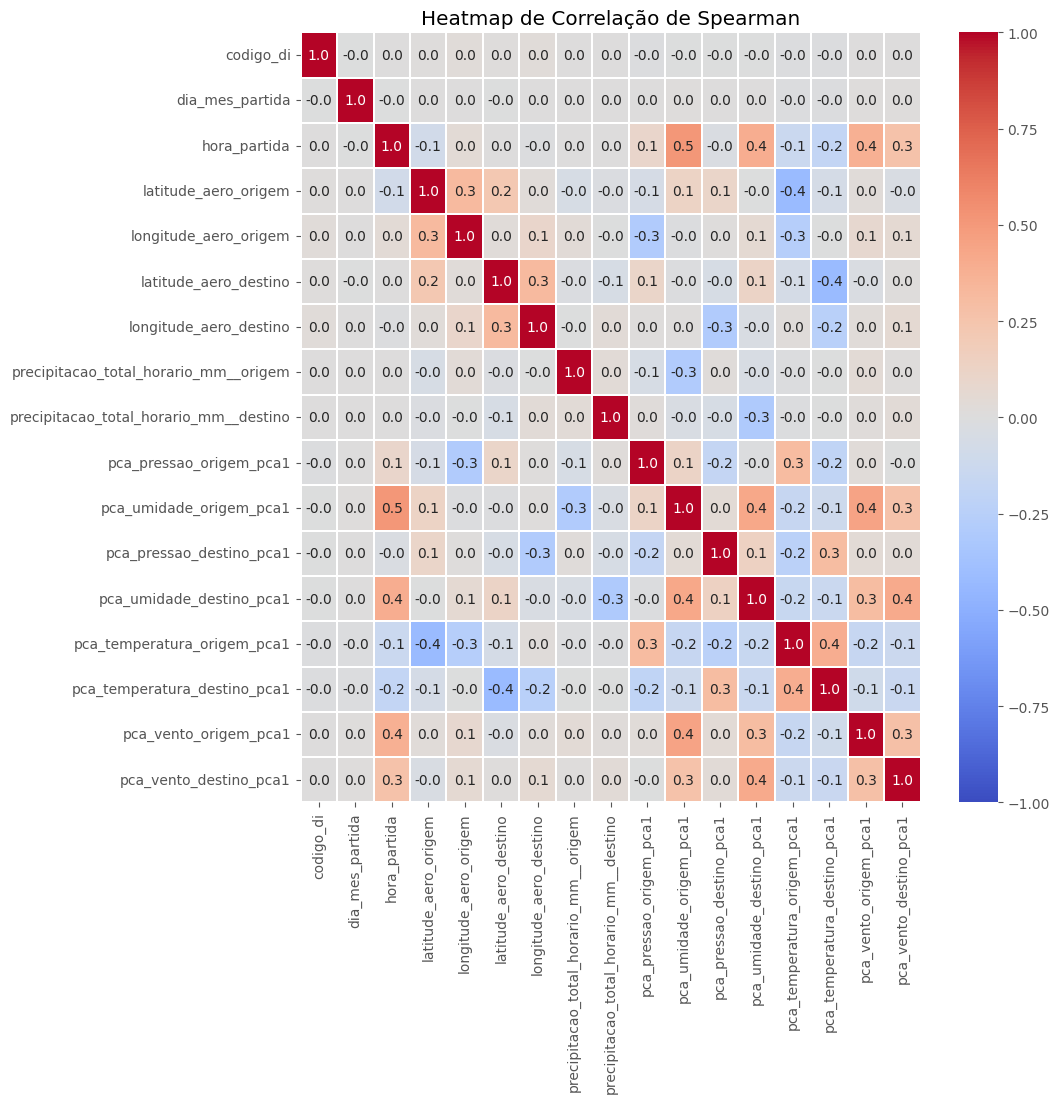

In [85]:
heatmap_correlacao_spearman(df)

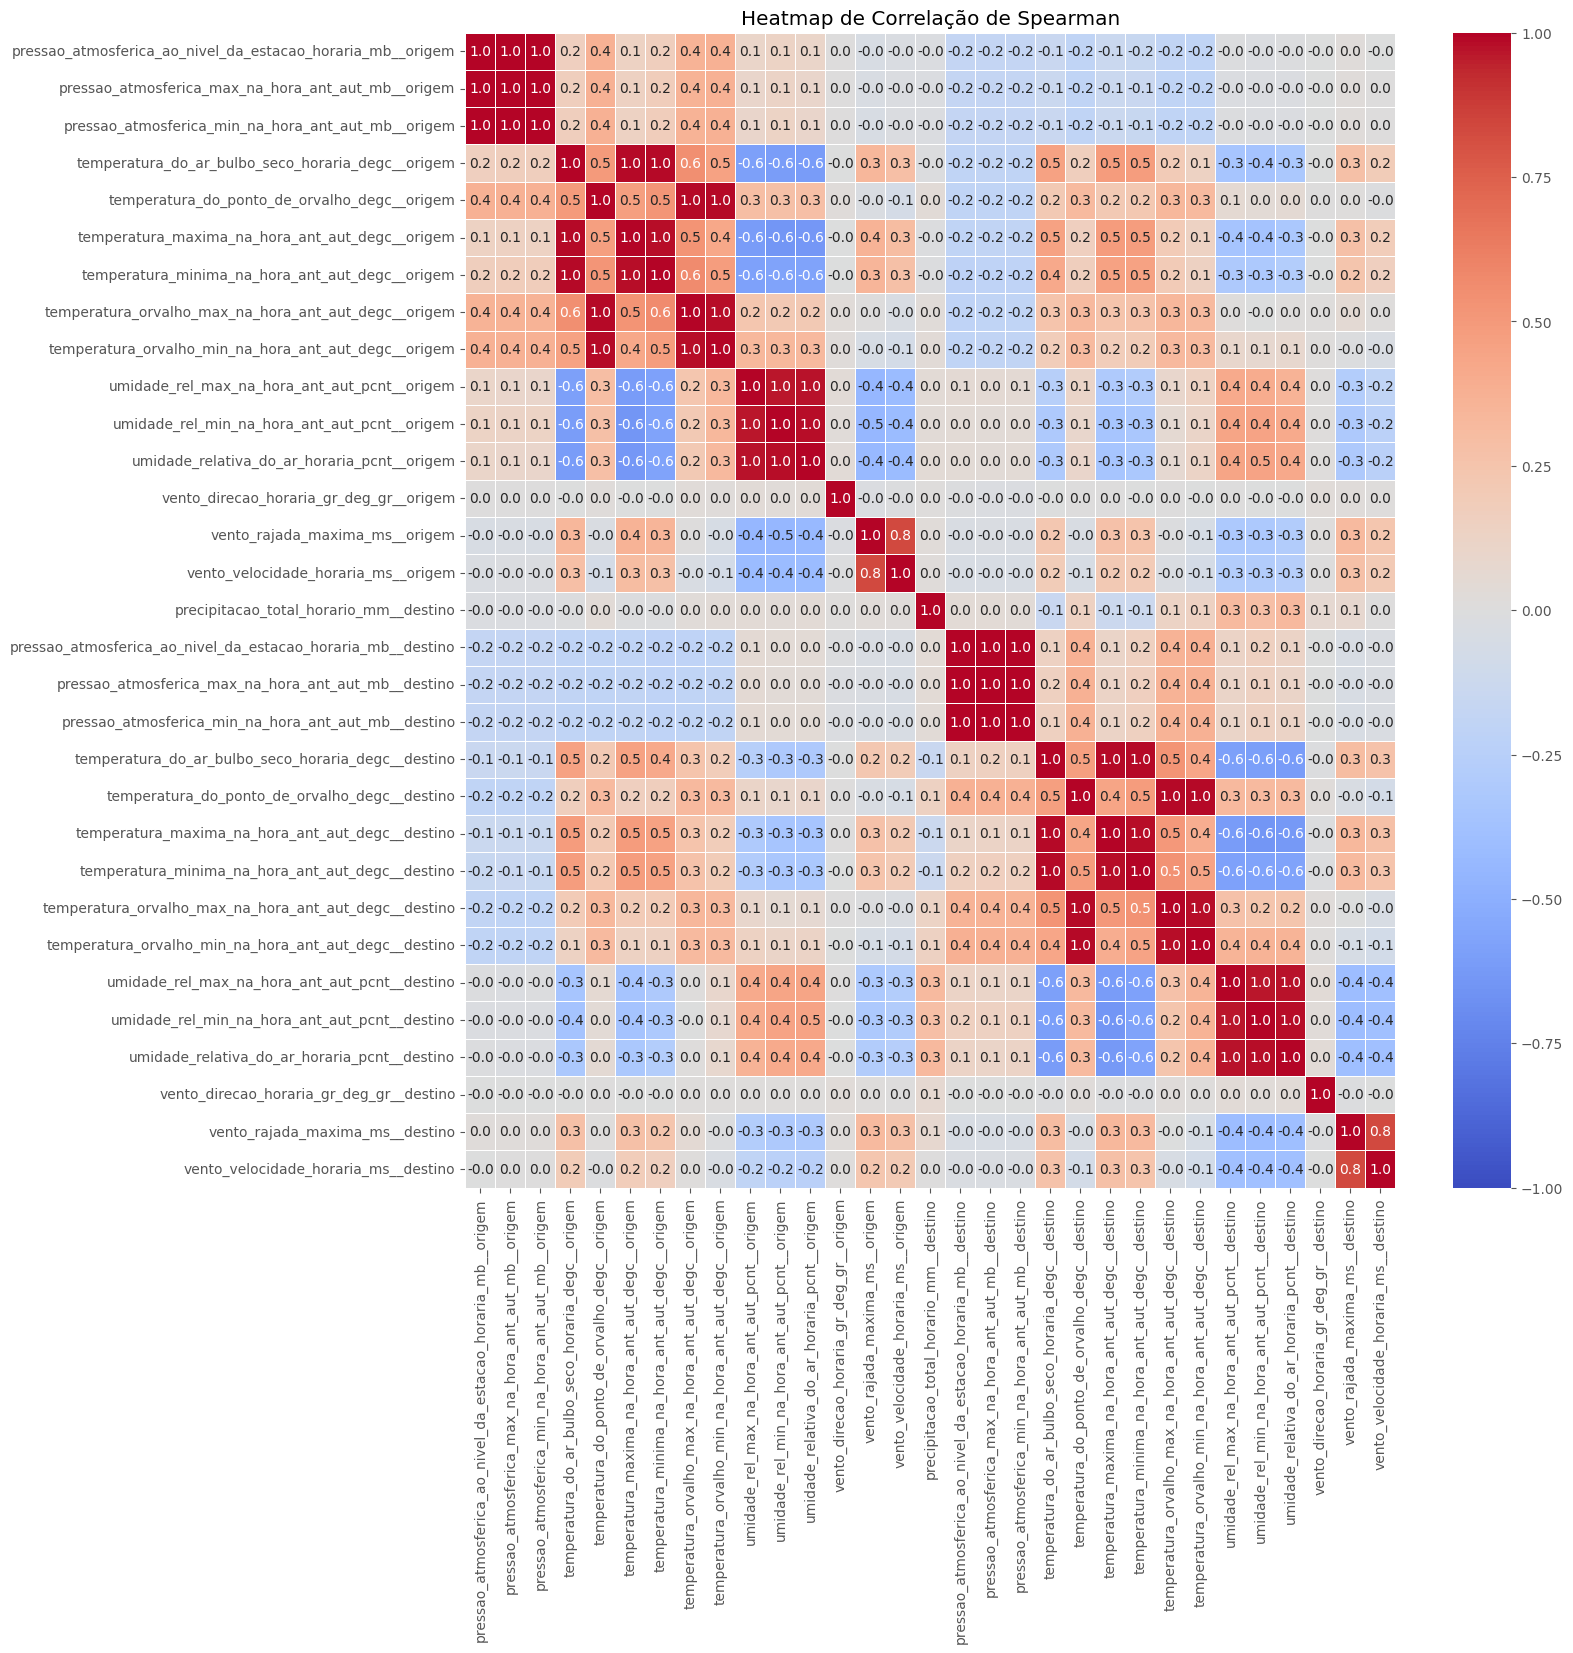

In [18]:
# Exemplo de como usar a função
heatmap_correlacao_spearman(df[[ 'pressao_atmosferica_ao_nivel_da_estacao_horaria_mb__origem',
 'pressao_atmosferica_max_na_hora_ant_aut_mb__origem',
 'pressao_atmosferica_min_na_hora_ant_aut_mb__origem',
 'temperatura_do_ar_bulbo_seco_horaria_degc__origem',
 'temperatura_do_ponto_de_orvalho_degc__origem',
 'temperatura_maxima_na_hora_ant_aut_degc__origem',
 'temperatura_minima_na_hora_ant_aut_degc__origem',
 'temperatura_orvalho_max_na_hora_ant_aut_degc__origem',
 'temperatura_orvalho_min_na_hora_ant_aut_degc__origem',
 'umidade_rel_max_na_hora_ant_aut_pcnt__origem',
 'umidade_rel_min_na_hora_ant_aut_pcnt__origem',
 'umidade_relativa_do_ar_horaria_pcnt__origem',
 'vento_direcao_horaria_gr_deg_gr__origem',
 'vento_rajada_maxima_ms__origem',
 'vento_velocidade_horaria_ms__origem',
 'regiao_destino',
 'precipitacao_total_horario_mm__destino',
 'pressao_atmosferica_ao_nivel_da_estacao_horaria_mb__destino',
 'pressao_atmosferica_max_na_hora_ant_aut_mb__destino',
 'pressao_atmosferica_min_na_hora_ant_aut_mb__destino',
 'temperatura_do_ar_bulbo_seco_horaria_degc__destino',
 'temperatura_do_ponto_de_orvalho_degc__destino',
 'temperatura_maxima_na_hora_ant_aut_degc__destino',
 'temperatura_minima_na_hora_ant_aut_degc__destino',
 'temperatura_orvalho_max_na_hora_ant_aut_degc__destino',
 'temperatura_orvalho_min_na_hora_ant_aut_degc__destino',
 'umidade_rel_max_na_hora_ant_aut_pcnt__destino',
 'umidade_rel_min_na_hora_ant_aut_pcnt__destino',
 'umidade_relativa_do_ar_horaria_pcnt__destino',
 'vento_direcao_horaria_gr_deg_gr__destino',
 'vento_rajada_maxima_ms__destino',
 'vento_velocidade_horaria_ms__destino']])

## Algoritmos

### Mutual Information (MI)

In [87]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

def variaveis_significativas_mi(
    df: pd.DataFrame,
    y: str,
    problem_type: str = 'classification',
    n_features: int = None
) -> pd.DataFrame:
    """
    Calcula a Informação Mútua entre variáveis preditoras e a variável alvo,
    retornando um DataFrame com as variáveis ordenadas pelo score de MI.

    Parâmetros:
    -----------
    df : pd.DataFrame
        DataFrame contendo os dados.
    y : str
        Nome da variável dependente (target) no DataFrame.
    problem_type : str, opcional
        Tipo de problema: 'classification' ou 'regression'. Padrão é 'classification'.
    n_features : int, opcional
        Número de features mais importantes a retornar. Se None, retorna todas.

    Retorna:
    --------
    pd.DataFrame
        DataFrame com duas colunas:
        — variável: nome da variável preditora  
        — score_mi: score de Informação Mútua  
        Ordenado do maior para o menor score. Se n_features for especificado,
        retorna apenas as top n_features.

    Exceções:
    ---------
    ValueError:
        — Se a variável alvo não existir no DataFrame.  
        — Se problem_type não for 'classification' nem 'regression'.
    """
    if y not in df.columns:
        raise ValueError(f"A variável dependente '{y}' não foi encontrada no DataFrame.")

    X = df.drop(columns=[y])
    y_data = df[y]

    # Encode categóricas
    X_encoded = X.copy()
    for col in X_encoded.select_dtypes(include=['object', 'category']):
        X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col].astype(str))

    # Encode target se necessário
    if problem_type == 'classification':
        y_encoded = LabelEncoder().fit_transform(y_data.astype(str)) if y_data.dtype == 'object' or y_data.dtype.name == 'category' else y_data
        mi_scores = mutual_info_classif(X_encoded, y_encoded, discrete_features='auto')
    elif problem_type == 'regression':
        y_encoded = y_data
        mi_scores = mutual_info_regression(X_encoded, y_encoded, discrete_features='auto')
    else:
        raise ValueError("O parâmetro 'problem_type' deve ser 'classification' ou 'regression'.")

    mi_df = pd.DataFrame({
        'variável': X.columns,
        'score_mi': mi_scores
    }).sort_values(by='score_mi', ascending=False).reset_index(drop=True)

    return mi_df.head(n_features) if n_features else mi_df


In [88]:
# Para um problema de classificação
mi_resultado = variaveis_significativas_mi(df, 'status_do_voo', problem_type='classification')

# Exibindo as variáveis mais significativas
print(mi_resultado)

                                  variável  score_mi
0                        codigo_tipo_linha  0.104518
1                           regiao_destino  0.053792
2                            regiao_origem  0.053011
3              pca_temperatura_origem_pca1  0.051999
4                            nome_empresas  0.051132
5                    pca_vento_origem_pca1  0.050393
6                  pca_pressao_origem_pca1  0.038435
7             pca_temperatura_destino_pca1  0.034033
8                   pca_vento_destino_pca1  0.031790
9                  pca_umidade_origem_pca1  0.028357
10                      numero_empresa_voo  0.026178
11                pca_pressao_destino_pca1  0.023992
12                               uf_origem  0.023387
13                              uf_destino  0.020787
14                      dia_semana_partida  0.019142
15                pca_umidade_destino_pca1  0.017403
16                            hora_partida  0.017100
17                             mes_partida  0.

In [115]:
mi_resultado

,variável,score_mi
0,codigo_tipo_linha,0.104518
1,regiao_destino,0.053792
2,regiao_origem,0.053011
3,pca_temperatura_origem_pca1,0.051999
4,nome_empresas,0.051132
5,pca_vento_origem_pca1,0.050393
6,pca_pressao_origem_pca1,0.038435
7,pca_temperatura_destino_pca1,0.034033
8,pca_vento_destino_pca1,0.031790
9,pca_umidade_origem_pca1,0.028357


In [89]:
# Se quiser selecionar apenas as top 10 variáveis
mi_top10 = variaveis_significativas_mi(df, 'status_do_voo', problem_type='classification', n_features=10)
print(mi_top10)

                       variável  score_mi
0             codigo_tipo_linha  0.103732
1                regiao_destino  0.053869
2                 regiao_origem  0.053654
3   pca_temperatura_origem_pca1  0.052145
4                 nome_empresas  0.050380
5         pca_vento_origem_pca1  0.049304
6       pca_pressao_origem_pca1  0.038671
7  pca_temperatura_destino_pca1  0.034005
8        pca_vento_destino_pca1  0.031520
9       pca_umidade_origem_pca1  0.028268


### ReliefF

In [90]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KDTree

def selecao_de_variaveis_relieff(
    X: pd.DataFrame, 
    y: pd.Series | np.ndarray, 
    n_neighbors: int = 10
) -> pd.DataFrame:
    """
    Implementa o algoritmo ReliefF para seleção de variáveis. Retorna um DataFrame contendo 
    apenas as variáveis preditoras ordenadas pelo score de relevância (do maior para o menor).

    Parâmetros:
    -----------
    X : pd.DataFrame
        Conjunto de dados com as variáveis preditoras.
    y : pd.Series ou np.ndarray
        Variável alvo.
    n_neighbors : int, opcional
        Número de vizinhos a considerar (padrão é 10).

    Retorna:
    --------
    pd.DataFrame
        Um DataFrame com duas colunas:
        — variável: nome da variável preditora  
        — score_relieff: score de relevância calculado pelo algoritmo ReliefF  
        Ordenado do maior para o menor score. Se não houver variáveis, retorna DataFrame vazio.

    Exceções:
    ---------
    ValueError:
        — Se X não for um DataFrame.  
        — Se y não for uma Série do pandas ou array do NumPy.
    """
    if not isinstance(X, pd.DataFrame):
        raise ValueError("O parâmetro 'X' deve ser um DataFrame do pandas.")
    if not isinstance(y, (pd.Series, np.ndarray)):
        raise ValueError("O parâmetro 'y' deve ser uma Série do pandas ou um array do NumPy.")

    X_copy = X.copy()
    for col in X_copy.select_dtypes(include=['object', 'category']).columns:
        X_copy[col] = LabelEncoder().fit_transform(X_copy[col].astype(str))

    X_array = X_copy.values
    y_encoded = LabelEncoder().fit_transform(y) if hasattr(y, "dtype") and y.dtype == object else np.array(y)

    tree = KDTree(X_array)
    n_features = X_array.shape[1]
    weights = np.zeros(n_features)
    classes = np.unique(y_encoded)
    n_classes = len(classes)

    for instance, label in zip(X_array, y_encoded):
        distances, indices = tree.query([instance], k=n_neighbors + 1)
        for idx in indices[0][1:]:
            diff = np.abs(instance - X_array[idx])
            if y_encoded[idx] == label:
                weights -= diff / n_neighbors
            else:
                weights += diff / (n_neighbors * (n_classes - 1))

    min_w, max_w = weights.min(), weights.max()
    weights = (weights - min_w) / (max_w - min_w) if max_w > min_w else np.zeros_like(weights)

    relieff_scores = pd.DataFrame({
        'variável': X_copy.columns,
        'score_relieff': weights
    }).sort_values(by='score_relieff', ascending=False).reset_index(drop=True)

    return relieff_scores

In [91]:
# Separando as variáveis preditoras e a variável alvo
X = df.drop(columns=['status_do_voo'])
y = df['status_do_voo']

# Aplicando a função de seleção de variáveis com ReliefF
relieff_resultado = selecao_de_variaveis_relieff(X, y, n_neighbors=10)

# Exibindo as variáveis mais significativas
print(relieff_resultado)

                                  variável  score_relieff
0                            nome_empresas       1.000000
1                        codigo_tipo_linha       0.999936
2                                codigo_di       0.999302
3                            regiao_origem       0.999047
4                         descricao_origem       0.998334
5                           regiao_destino       0.997256
6                    longitude_aero_origem       0.996438
7                                uf_origem       0.995131
8                     latitude_aero_origem       0.994412
9                            cidade_origem       0.989429
10                  longitude_aero_destino       0.989355
11                   latitude_aero_destino       0.985433
12                              uf_destino       0.983517
13                                    rota       0.977667
14                       descricao_destino       0.974935
15                          cidade_destino       0.974312
16            

### Information Gain

In [92]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def variaveis_significativas_information_gain(df: pd.DataFrame, y: str) -> pd.DataFrame:
    """
    Calcula o Ganho de Informação (Information Gain) entre variáveis preditoras e a variável alvo.
    Retorna um DataFrame contendo apenas as variáveis preditoras ordenadas pelo score de Information Gain 
    (do maior para o menor).

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        O nome da variável dependente (target) no DataFrame.

    Retorna:
    --------
    pd.DataFrame
        Um DataFrame com duas colunas:
        — variável: nome da variável preditora  
        — score_information_gain: valor do Information Gain  
        Ordenado do maior para o menor score. Se não houver variáveis preditoras, retorna DataFrame vazio.

    Exceções:
    ---------
    ValueError:
        — Se a variável dependente não estiver presente no DataFrame.
    """
    if y not in df.columns:
        raise ValueError(f"A variável dependente '{y}' não foi encontrada no DataFrame.")

    X = df.drop(columns=[y])
    y_data = df[y]

    # Encode target se categórica
    if y_data.dtype == 'object' or y_data.dtype.name == 'category':
        y_encoded = LabelEncoder().fit_transform(y_data.astype(str))
    else:
        y_encoded = y_data.values

    def calcular_entropia(arr):
        _, counts = np.unique(arr, return_counts=True)
        probs = counts / counts.sum()
        return -np.sum(probs * np.log2(probs))

    entropia_y = calcular_entropia(y_encoded)

    resultados = []
    for coluna in X.columns:
        col = X[coluna]
        if col.dtype == 'object' or col.dtype.name == 'category':
            col_encoded = LabelEncoder().fit_transform(col.astype(str))
        else:
            col_encoded = col.fillna(col.median()).values

        # Entropia condicional H(Y|X)
        valores, counts = np.unique(col_encoded, return_counts=True)
        entropia_cond = sum(
            (counts[i] / len(col_encoded)) * calcular_entropia(y_encoded[col_encoded == valor])
            for i, valor in enumerate(valores)
        )

        ig = entropia_y - entropia_cond
        resultados.append({'variável': coluna, 'score_information_gain': ig})

    ig_df = pd.DataFrame(resultados).sort_values(by='score_information_gain', ascending=False).reset_index(drop=True)
    return ig_df


In [93]:
# Calculando o Information Gain para cada variável preditora
ig_resultado = variaveis_significativas_information_gain(df, 'status_do_voo')

# Exibindo as variáveis mais significativas
print(ig_resultado)

                                  variável  score_information_gain
0              pca_temperatura_origem_pca1                0.280299
1             pca_temperatura_destino_pca1                0.272090
2                    pca_vento_origem_pca1                0.253119
3                   pca_vento_destino_pca1                0.242151
4                  pca_pressao_origem_pca1                0.132215
5                 pca_pressao_destino_pca1                0.116950
6                  pca_umidade_origem_pca1                0.076113
7                 pca_umidade_destino_pca1                0.063386
8                       numero_empresa_voo                0.042908
9                             hora_partida                0.017791
10                                    rota                0.011668
11                             mes_partida                0.008193
12                    latitude_aero_origem                0.005861
13                   longitude_aero_origem                0.00

In [117]:
ig_resultado

,variável,score_information_gain
0,pca_temperatura_origem_pca1,0.280299
1,pca_temperatura_destino_pca1,0.272090
2,pca_vento_origem_pca1,0.253119
3,pca_vento_destino_pca1,0.242151
4,pca_pressao_origem_pca1,0.132215
5,pca_pressao_destino_pca1,0.116950
6,pca_umidade_origem_pca1,0.076113
7,pca_umidade_destino_pca1,0.063386
8,numero_empresa_voo,0.042908
9,hora_partida,0.017791


### Information Value IV

In [94]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def variaveis_significativas_information_value(
    df: pd.DataFrame, 
    y: str, 
    bins: int = 10, 
    show_woe: bool = False
) -> pd.DataFrame | tuple[pd.DataFrame, dict]:
    """
    Calcula o Information Value (IV) e opcionalmente o Weight of Evidence (WoE) para cada variável preditora 
    em relação à variável alvo binária. Retorna um DataFrame ordenado pelo IV (do maior para o menor). 

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        Nome da variável dependente binária no DataFrame.
    bins : int, opcional
        Número de bins para discretizar variáveis numéricas (padrão = 10).
    show_woe : bool, opcional
        Se True, retorna também um dicionário com DataFrames de WoE para cada variável.

    Retorna:
    --------
    pd.DataFrame
        DataFrame com duas colunas:
        — variável: nome da variável preditora  
        — information_value: valor do Information Value  
        Ordenado do maior para o menor.  
    tuple(pd.DataFrame, dict)
        Se show_woe=True, retorna também um dicionário cujo chave é o nome da variável e valor é um DataFrame com colunas WoE por bin.

    Exceções:
    ---------
    ValueError:
        — Se a variável dependente não existir no DataFrame.  
        — Se a variável dependente não for binária.
    """
    if y not in df.columns:
        raise ValueError(f"A variável dependente '{y}' não foi encontrada no DataFrame.")
    if df[y].nunique() != 2:
        raise ValueError("A variável dependente deve ser binária.")

    df_copy = df.copy()
    df_copy[y] = LabelEncoder().fit_transform(df_copy[y])

    total_eventos = df_copy[y].sum()
    total_nao_eventos = df_copy.shape[0] - total_eventos

    iv_list = []
    woe_dict = {}

    for coluna in df_copy.drop(columns=[y]).columns:
        x = df_copy[coluna]
        if pd.api.types.is_numeric_dtype(x):
            x_binned = pd.qcut(x, q=bins, duplicates='drop')
        else:
            x_binned = x.astype(str)

        agg = pd.DataFrame({
            'total': x_binned.value_counts(),
            'eventos': df_copy.groupby(x_binned)[y].sum()
        }).fillna(0)
        agg['nao_eventos'] = agg['total'] - agg['eventos']
        agg['prop_eventos'] = agg['eventos'] / total_eventos
        agg['prop_nao_eventos'] = agg['nao_eventos'] / total_nao_eventos
        agg.replace({'prop_eventos': {0: 1e-4}, 'prop_nao_eventos': {0: 1e-4}}, inplace=True)

        agg['woe'] = np.log(agg['prop_eventos'] / agg['prop_nao_eventos'])
        agg['iv'] = (agg['prop_eventos'] - agg['prop_nao_eventos']) * agg['woe']
        iv_value = agg['iv'].sum()

        iv_list.append({'variável': coluna, 'information_value': iv_value})
        if show_woe:
            woe_dict[coluna] = agg[['woe']]

    iv_df = pd.DataFrame(iv_list).sort_values(by='information_value', ascending=False).reset_index(drop=True)

    return (iv_df, woe_dict) if show_woe else iv_df

In [96]:
# Calculando o Information Value para cada variável preditora
iv_resultado = variaveis_significativas_information_value(df, y='status_do_voo', bins=10, show_woe=False)

# Exibindo as variáveis mais significativas
print(iv_resultado)

                                  variável  information_value
0                       numero_empresa_voo           0.648536
1                             hora_partida           0.177091
2                                     rota           0.142809
3                              mes_partida           0.086241
4                  pca_pressao_origem_pca1           0.064413
5                         descricao_origem           0.063329
6                            cidade_origem           0.063157
7                            nome_empresas           0.056059
8                                uf_origem           0.050501
9             pca_temperatura_destino_pca1           0.049660
10                   longitude_aero_origem           0.040432
11                   pca_vento_origem_pca1           0.040158
12                  pca_vento_destino_pca1           0.039213
13                    latitude_aero_origem           0.038982
14                      dia_semana_partida           0.038825
15      

In [98]:
iv_df, woe = variaveis_significativas_information_value(df, 'status_do_voo', show_woe=True)

In [116]:
iv_df

,variável,information_value
0,numero_empresa_voo,0.648536
1,hora_partida,0.177091
2,rota,0.142809
3,mes_partida,0.086241
4,pca_pressao_origem_pca1,0.064413
5,descricao_origem,0.063329
6,cidade_origem,0.063157
7,nome_empresas,0.056059
8,uf_origem,0.050501
9,pca_temperatura_destino_pca1,0.049660


In [ ]:
woe

## Uso de modelos

In [15]:
colunas_categ = df.select_dtypes(include=['object']).columns.tolist()
colunas_categ

['nome_empresas',
 'codigo_tipo_linha',
 'descricao_origem',
 'descricao_destino',
 'status_do_voo',
 'cidade_origem',
 'uf_origem',
 'cidade_destino',
 'uf_destino',
 'mes_partida',
 'dia_semana_partida',
 'rota',
 'regiao_origem',
 'regiao_destino',
 'numero_empresa_voo']

In [16]:
# Selecionar apenas colunas numéricas
colunas_numericas = df.select_dtypes(include=['float64', 'int64', 'int32']).columns.tolist()
colunas_numericas

['codigo_di',
 'dia_mes_partida',
 'hora_partida',
 'latitude_aero_origem',
 'longitude_aero_origem',
 'latitude_aero_destino',
 'longitude_aero_destino',
 'precipitacao_total_horario_mm__origem',
 'vento_direcao_horaria_gr_deg_gr__origem',
 'vento_rajada_maxima_ms__origem',
 'vento_velocidade_horaria_ms__origem',
 'precipitacao_total_horario_mm__destino',
 'vento_direcao_horaria_gr_deg_gr__destino',
 'vento_rajada_maxima_ms__destino',
 'vento_velocidade_horaria_ms__destino',
 'pca_pressao_origem_pca1',
 'pca_umidade_origem_pca1',
 'pca_pressao_destino_pca1',
 'pca_umidade_destino_pca1',
 'pca_temperatura_origem_pca1',
 'pca_temperatura_destino_pca1']

###  Pre-treino para feature selection

In [17]:
df_feature = df
# Seleção das features(variaveis) preditoras
dt_ax = df_feature.drop(columns = ['status_do_voo'])

# Seleção da variavel a ser predita a probabilidade
dt_ay = df_feature[['status_do_voo']].copy()

label_encoder = LabelEncoder()
dt_ay = label_encoder.fit_transform(dt_ay)

list_dummies = ['nome_empresas', 'numero_empresa_voo', 'codigo_tipo_linha',
 'descricao_origem', 'descricao_destino', 'cidade_origem',
 'uf_origem', 'cidade_destino', 'uf_destino',
 'mes_partida', 'dia_semana_partida', 'rota',
 'regiao_origem', 'regiao_destino']

dt_ax_dummies = pd.get_dummies(dt_ax, columns=list_dummies, dummy_na=True)

# Segmentação em Treino (75%) e Teste (25%)
X_train_hot, X_test_hot, y_train_hot, y_test_hot = train_test_split(dt_ax_dummies, dt_ay, random_state=42, test_size=0.25)

# Segmentação em Treino (75%) e Teste (25%)
X_train, X_test, y_train, y_test = train_test_split(dt_ax, dt_ay, random_state=42, test_size=0.25)

In [18]:
# XGBoost
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train_hot,y_train_hot)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [19]:
# Catboost
cat_features =  list(dt_ax.select_dtypes(include=['object']))

model_ctb = ctb.CatBoostClassifier( cat_features = cat_features)
model_ctb.fit(dt_ax, dt_ay, cat_features=cat_features, verbose=False)

print('CatBoost model is fitted: ' + str(model_ctb.is_fitted()))

CatBoost model is fitted: True


### Feature Importance

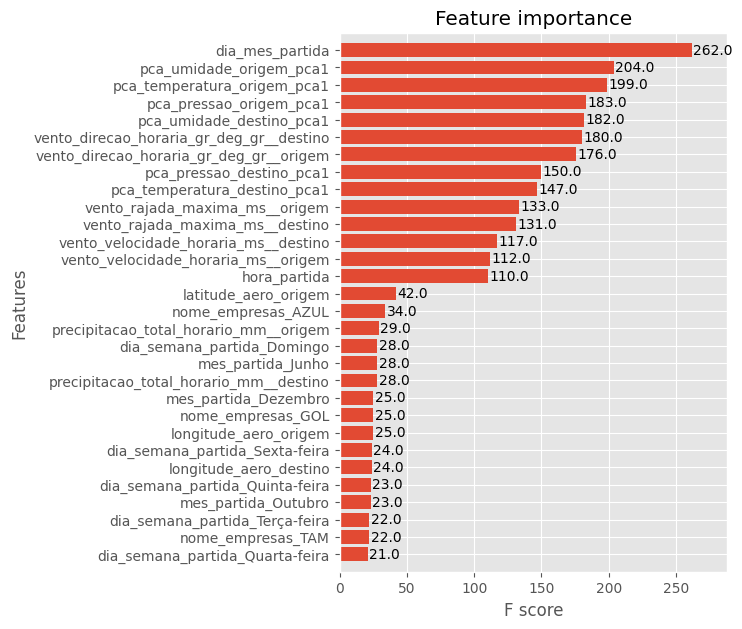

In [121]:
fig, ax = plt.subplots(figsize=(5,7))
xgb.plot_importance(model_xgb, max_num_features=30, height=0.8, ax=ax)
plt.show()

Text(0.5, 1.0, 'Feature Importance CatBoost')

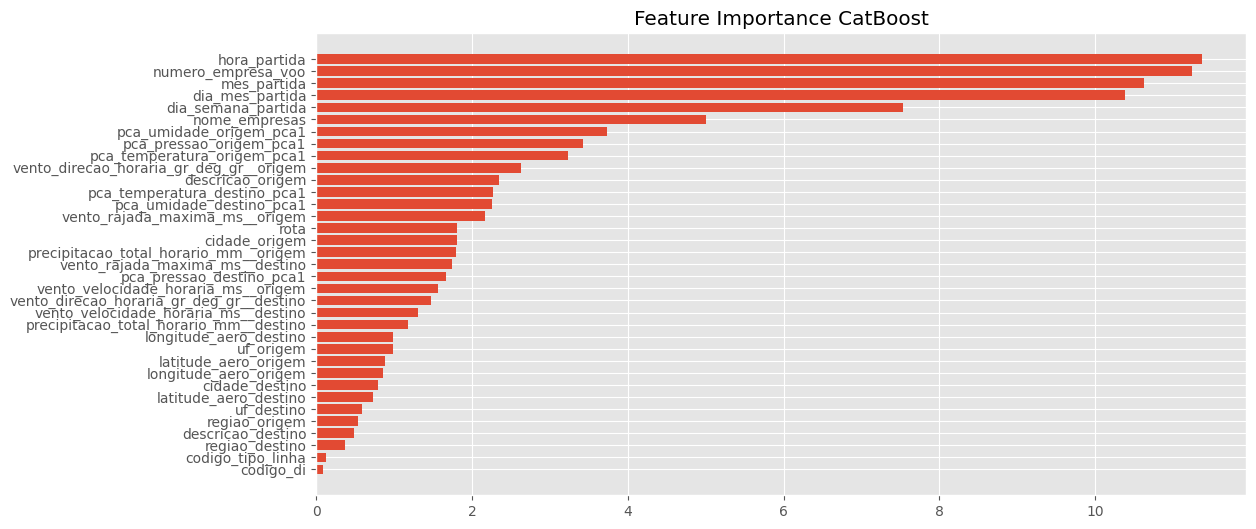

In [122]:
feature_importance = model_ctb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance CatBoost')

### Permutation Importance

In [ ]:
%%time
perm_importance = permutation_importance(model_xgb, X_test_hot, y_test_hot, n_repeats=10, random_state=123)

top_n = 25
# Ordenando as características pela importância e selecionando as top_n
sorted_idx = perm_importance.importances_mean.argsort()[-top_n:]

# Criando o gráfico de barras horizontal
plt.figure(figsize=(10, 8))  # Ajuste o tamanho conforme necessário
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')

# Definindo os y-ticks para serem os nomes das características
plt.yticks(range(len(sorted_idx)), np.array(X_test_hot.columns)[sorted_idx])

# Título do gráfico
plt.title('Top {} Features Permutation Importance'.format(top_n))

# Layout apertado para arranjo visual limpo
plt.tight_layout()

# Mostrar o gráfico
plt.show()

CPU times: total: 22min 34s
Wall time: 6min 28s


Text(0.5, 1.0, 'Permutation Importance')

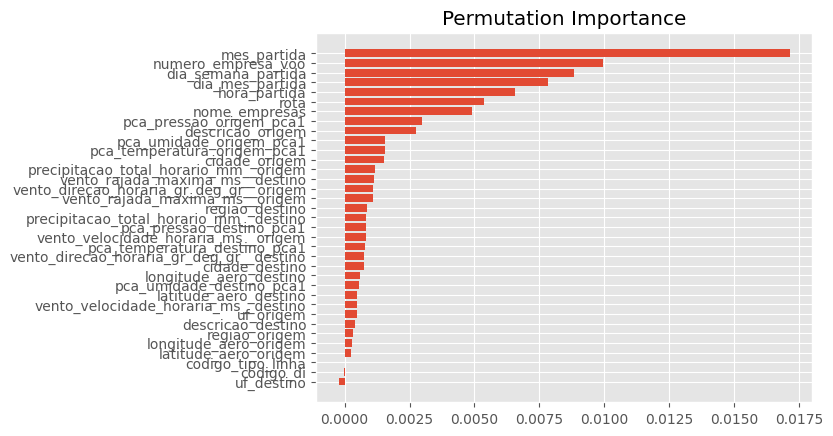

In [22]:
%%time
perm_importance = permutation_importance(model_ctb, X_test, y_test, n_repeats=25, random_state=123)
sorted_idx = perm_importance.importances_mean.argsort()
#fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance')

### Shap

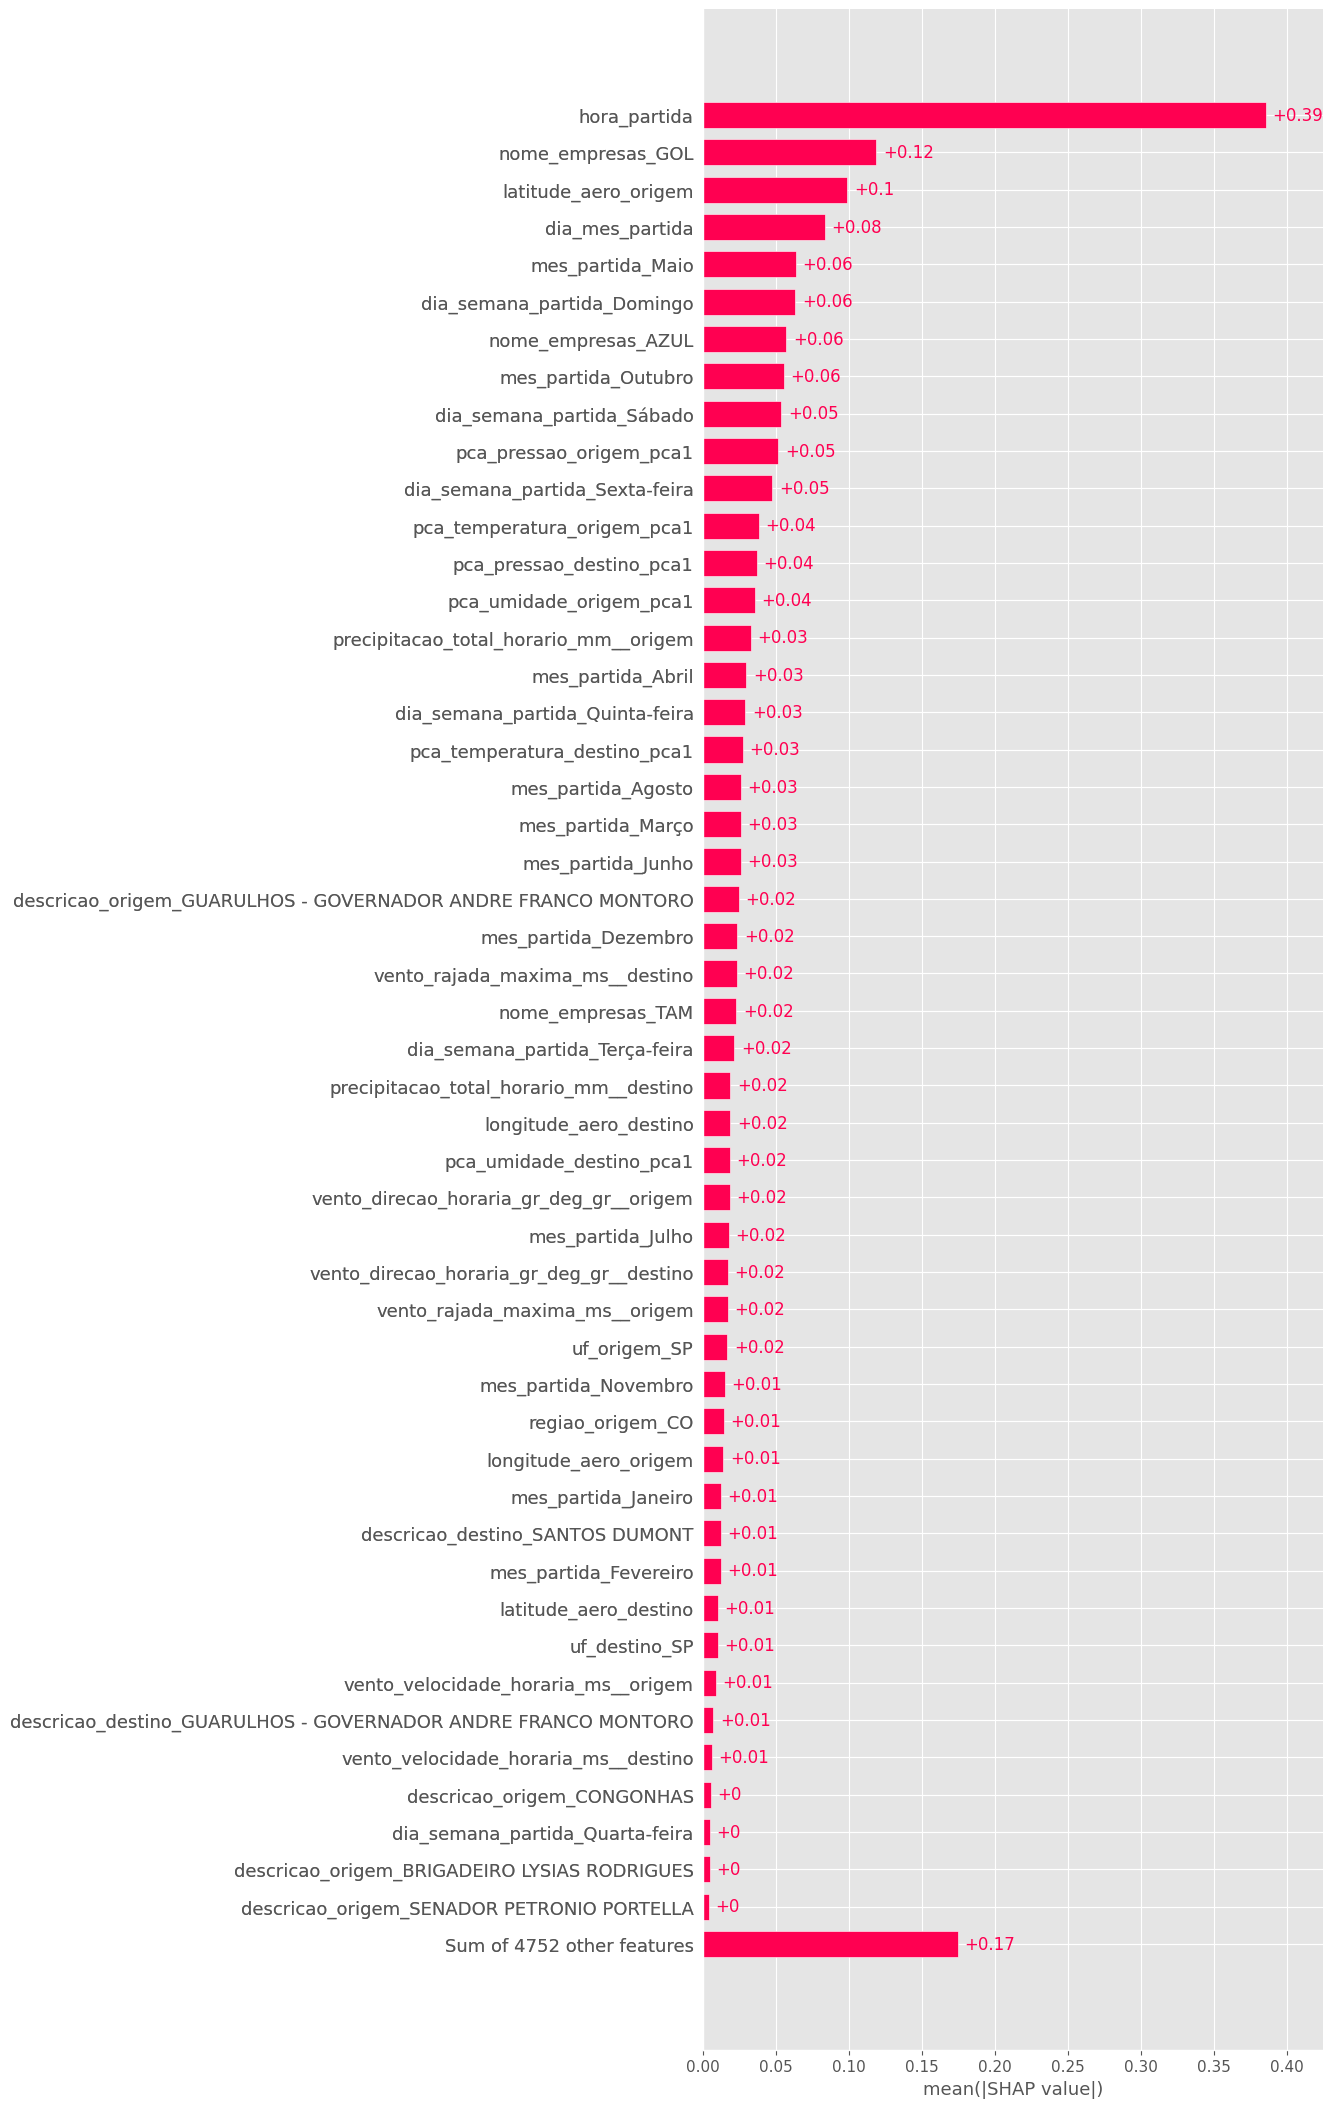

In [124]:
%%time
explainer = shap.Explainer(model_xgb)
shap_values = explainer(X_test_hot)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
#fig = plt.figure(figsize=(22, 21))
#plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
#plt.yticks(range(len(sorted_idx)), np.array(X_test_hot.columns)[sorted_idx])
#plt.title('SHAP Importance')
shap.plots.bar(shap_values, max_display=50)

Text(0.5, 1.0, 'SHAP Importance')

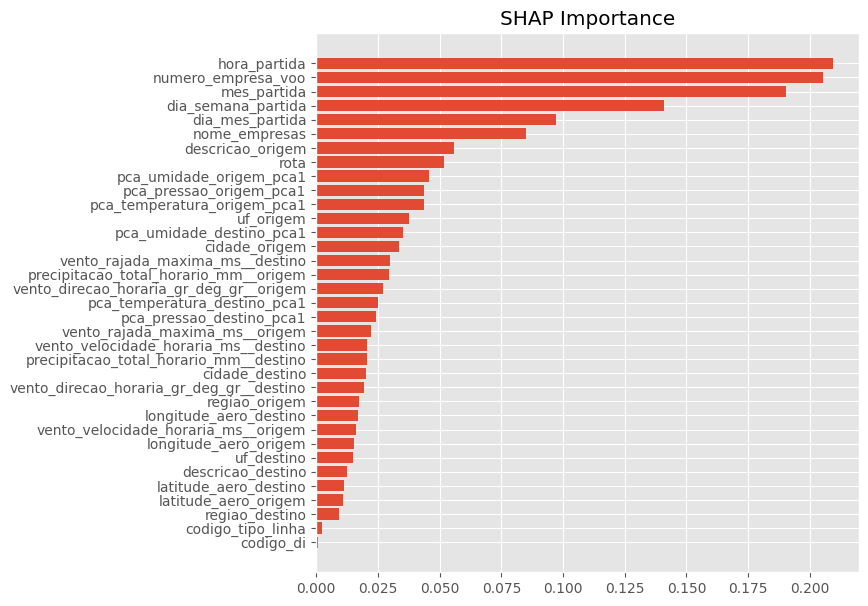

In [125]:
explainer = shap.Explainer(model_ctb)
shap_values = explainer(dt_ax)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
fig = plt.figure(figsize=(7, 7))
plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(dt_ax.columns)[sorted_idx])
plt.title('SHAP Importance')

### Recursive Feature Elimination

In [128]:
def engenharia_de_features_recursiva(modelo, X, y):
    """
    Aplica Recursive Feature Elimination (RFE) para selecionar as melhores features
    de acordo com a importância das variáveis no modelo fornecido.

    Parâmetros:
    -----------
    modelo : objeto do modelo
        O modelo de aprendizado de máquina a ser utilizado (pode ser qualquer modelo com `coef_` ou `feature_importances_`).
    X : pd.DataFrame ou np.array
        O conjunto de dados com as variáveis preditoras.
    y : pd.Series ou np.array
        O conjunto de dados com a variável alvo.

    Retorna:
    --------
    dict
        Um dicionário contendo:
        - 'modelo_rfe': O modelo RFE treinado.
        - 'n_features': O número de features selecionadas.
        - 'suporte': Um array booleano indicando as variáveis selecionadas.
        - 'ranking': O ranking das variáveis.
        - 'colunas_selecionadas': As colunas do DataFrame X que foram selecionadas.
    """
    
    # Aplicando RFE no modelo fornecido
    rfe = RFE(modelo)
    rfe_fit = rfe.fit(X, y)
    
    # Criando um dicionário com os resultados
    resultados_rfe = {
        'modelo_rfe': rfe_fit,
        'n_features': rfe_fit.n_features_,
        'suporte': rfe_fit.support_,
        'ranking': rfe_fit.ranking_,
        'colunas_selecionadas': X.columns[rfe_fit.support_].tolist()
    }
    
    return resultados_rfe

In [ ]:
# Exemplo de uso da função
resultado_rfe = engenharia_de_features_recursiva(model_xgb, X_train_hot, y_train_hot)

# Acessando as colunas significativas
colunas_significativas_rfe = resultado_rfe['colunas_selecionadas']

In [ ]:
colunas_significativas_rfe

In [136]:
## RFE Catboost
rfe_dict = model_ctb.select_features(X = dt_ax, 
                                     y = dt_ay, 
                                     features_for_select = '0-25',
                                     num_features_to_select = 25,
                                     steps = 2,
                                     train_final_model = False,
                                     plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

The number of features selection steps (2) is greater than the number of features to eliminate (1). The number of steps was reduced to 1.


Learning rate set to 0.132343
Step #1 out of 1
0:	learn: 0.6233349	total: 239ms	remaining: 3m 59s
1:	learn: 0.5705368	total: 521ms	remaining: 4m 19s
2:	learn: 0.5336218	total: 771ms	remaining: 4m 16s
3:	learn: 0.5054837	total: 1.03s	remaining: 4m 16s
4:	learn: 0.4849650	total: 1.31s	remaining: 4m 20s
5:	learn: 0.4710244	total: 1.56s	remaining: 4m 18s
6:	learn: 0.4590184	total: 1.8s	remaining: 4m 15s
7:	learn: 0.4499970	total: 2.04s	remaining: 4m 12s
8:	learn: 0.4426229	total: 2.27s	remaining: 4m 10s
9:	learn: 0.4382189	total: 2.48s	remaining: 4m 5s
10:	learn: 0.4342978	total: 2.71s	remaining: 4m 4s
11:	learn: 0.4313573	total: 2.94s	remaining: 4m 2s
12:	learn: 0.4286515	total: 3.23s	remaining: 4m 5s
13:	learn: 0.4262357	total: 3.51s	remaining: 4m 7s
14:	learn: 0.4243169	total: 3.73s	remaining: 4m 4s
15:	learn: 0.4226761	total: 3.96s	remaining: 4m 3s
16:	learn: 0.4213595	total: 4.23s	remaining: 4m 4s
17:	learn: 0.4203477	total: 4.52s	remaining: 4m 6s
18:	learn: 0.4196536	total: 4.75s	rem

In [137]:
rfe_dict

{'selected_features': [0,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 'eliminated_features_names': ['codigo_di'],
 'loss_graph': {'main_indices': [0],
  'removed_features_count': [0, 1],
  'loss_values': [0.36104165059178406, 0.36104574644070825]},
 'eliminated_features': [1],
 'selected_features_names': ['nome_empresas',
  'codigo_tipo_linha',
  'descricao_origem',
  'descricao_destino',
  'cidade_origem',
  'uf_origem',
  'cidade_destino',
  'uf_destino',
  'mes_partida',
  'dia_semana_partida',
  'dia_mes_partida',
  'hora_partida',
  'latitude_aero_origem',
  'longitude_aero_origem',
  'latitude_aero_destino',
  'longitude_aero_destino',
  'rota',
  'regiao_origem',
  'precipitacao_total_horario_mm__origem',
  'vento_direcao_horaria_gr_deg_gr__origem',
  'vento_rajada_maxima_ms__origem',
  'vento_velocidade_horaria_ms__origem',
  'regiao_destino',
  'precipitacao_total_horario_mm__destino'

### Select From model

In [20]:
def selecao_variaveis_modelo(modelo, X_train, y_train, X_test, y_test, metric_func, metric_name="Metric", alpha=0.75) -> list:
    """
    Realiza a seleção de variáveis com base na importância das features de um modelo CatBoost, LightGBM ou XGBoost.
    Para cada limiar de importância, treina um modelo e avalia a métrica especificada.

    Parâmetros:
    -----------
    modelo : objeto treinado (CatBoost, LightGBM ou XGBoost)
        O modelo já treinado (de qualquer uma das três bibliotecas suportadas).
    X_train : pd.DataFrame ou np.array
        O conjunto de treino com as variáveis preditoras.
    y_train : pd.Series ou np.array
        O conjunto de treino com a variável alvo.
    X_test : pd.DataFrame ou np.array
        O conjunto de teste com as variáveis preditoras.
    y_test : pd.Series ou np.array
        O conjunto de teste com a variável alvo.
    metric_func : function
        A função de métrica que será usada para avaliar o modelo (ex.: accuracy_score, f1_score).
    metric_name : str, opcional
        O nome da métrica, usado para impressão no output. O padrão é 'Metric'.
    alpha : float, opcional
        O limiar de desempenho acima do qual as variáveis selecionadas serão retornadas. O padrão é 0.90.

    Retorna:
    --------
    list
        Uma lista contendo os nomes ou índices das variáveis mais importantes selecionadas pelo modelo.
    """

    # Obter importâncias das features do modelo
    if hasattr(modelo, "feature_importances_"):
        feature_importances = modelo.feature_importances_
    elif hasattr(modelo, "get_feature_importance"):
        feature_importances = modelo.get_feature_importance()
    else:
        raise ValueError("O modelo fornecido não suporta a obtenção de importâncias das features.")

    # Previsões iniciais e avaliação
    predictions = modelo.predict(X_test)
    metric_value = metric_func(y_test, predictions)
    print(f"{metric_name} inicial: {metric_value:.2f}")

    # Ordenar as importâncias das features
    thresholds = np.sort(feature_importances)
    
    variaveis_selecionadas = []
    
    # Iterar por cada limiar de importância
    for thresh in thresholds:
        # Selecionar features usando o limiar atual
        selection = SelectFromModel(modelo, threshold=thresh, prefit=True)
        select_X_train = selection.transform(X_train)

        # Verificar se o modelo é do tipo CatBoost, LightGBM ou XGBoost e treinar o modelo adequado
        if isinstance(modelo, xgb.XGBClassifier):
            selection_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbose=False)
        elif isinstance(modelo, lgb.LGBMClassifier):
            selection_model = lgb.LGBMClassifier()
        elif isinstance(modelo, catboost.CatBoostClassifier):
            selection_model = catboost.CatBoostClassifier(verbose=0)
        else:
            raise ValueError("O modelo fornecido não é suportado. Use CatBoost, LightGBM ou XGBoost.")

        # Treinar o modelo com as features selecionadas
        selection_model.fit(select_X_train, y_train)

        # Avaliar o modelo com as features selecionadas
        select_X_test = selection.transform(X_test)
        predictions = selection_model.predict(select_X_test)
        metric_value = metric_func(y_test, predictions)
        print(f"Thresh={thresh:.3f}, n={select_X_train.shape[1]}, {metric_name}: {metric_value:.2f}")

        # Se a métrica com o limiar atual for boa, armazenar as variáveis
        if metric_value > alpha:
            variaveis_selecionadas.append(select_X_train)

    return variaveis_selecionadas

In [21]:
variaveis_importantes_xgb = selecao_variaveis_modelo(model_xgb, X_train_hot, y_train_hot, X_test_hot, y_test_hot, accuracy_score, "Acurácia")

Acurácia inicial: 0.83
Thresh=0.000, n=4801, Acurácia: 0.83
Thresh=0.000, n=4801, Acurácia: 0.83
Thresh=0.000, n=4801, Acurácia: 0.83
Thresh=0.000, n=4801, Acurácia: 0.83
Thresh=0.000, n=4801, Acurácia: 0.83
Thresh=0.000, n=4801, Acurácia: 0.83
Thresh=0.000, n=4801, Acurácia: 0.83
Thresh=0.000, n=4801, Acurácia: 0.83
Thresh=0.000, n=4801, Acurácia: 0.83
Thresh=0.000, n=4801, Acurácia: 0.83
Thresh=0.000, n=4801, Acurácia: 0.83


MemoryError: Unable to allocate 10.6 GiB for an array with shape (4801, 296284) and data type float64

In [ ]:
variaveis_importantes_xgb